<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Probability And Statistics For Everyone</h1>
        <h1>Probability Distributions</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 593e30c0dfcafd50401dbb083769424707ebe00c

scipy     : 1.6.1
numpy     : 1.24.2
watermark : 2.1.0
json      : 2.0.9
matplotlib: 3.3.2



Set the default style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Uniform distribution

Let us generate a few random numbers in the $\left[0, 52\right)$ interval. This is similar to repeatedly picking cards from a deck if we place the card back each time

In [4]:
cards = np.random.randint(0, 52, 52*1000)

In [5]:
counts, bin_edges = np.histogram(cards, bins=52)

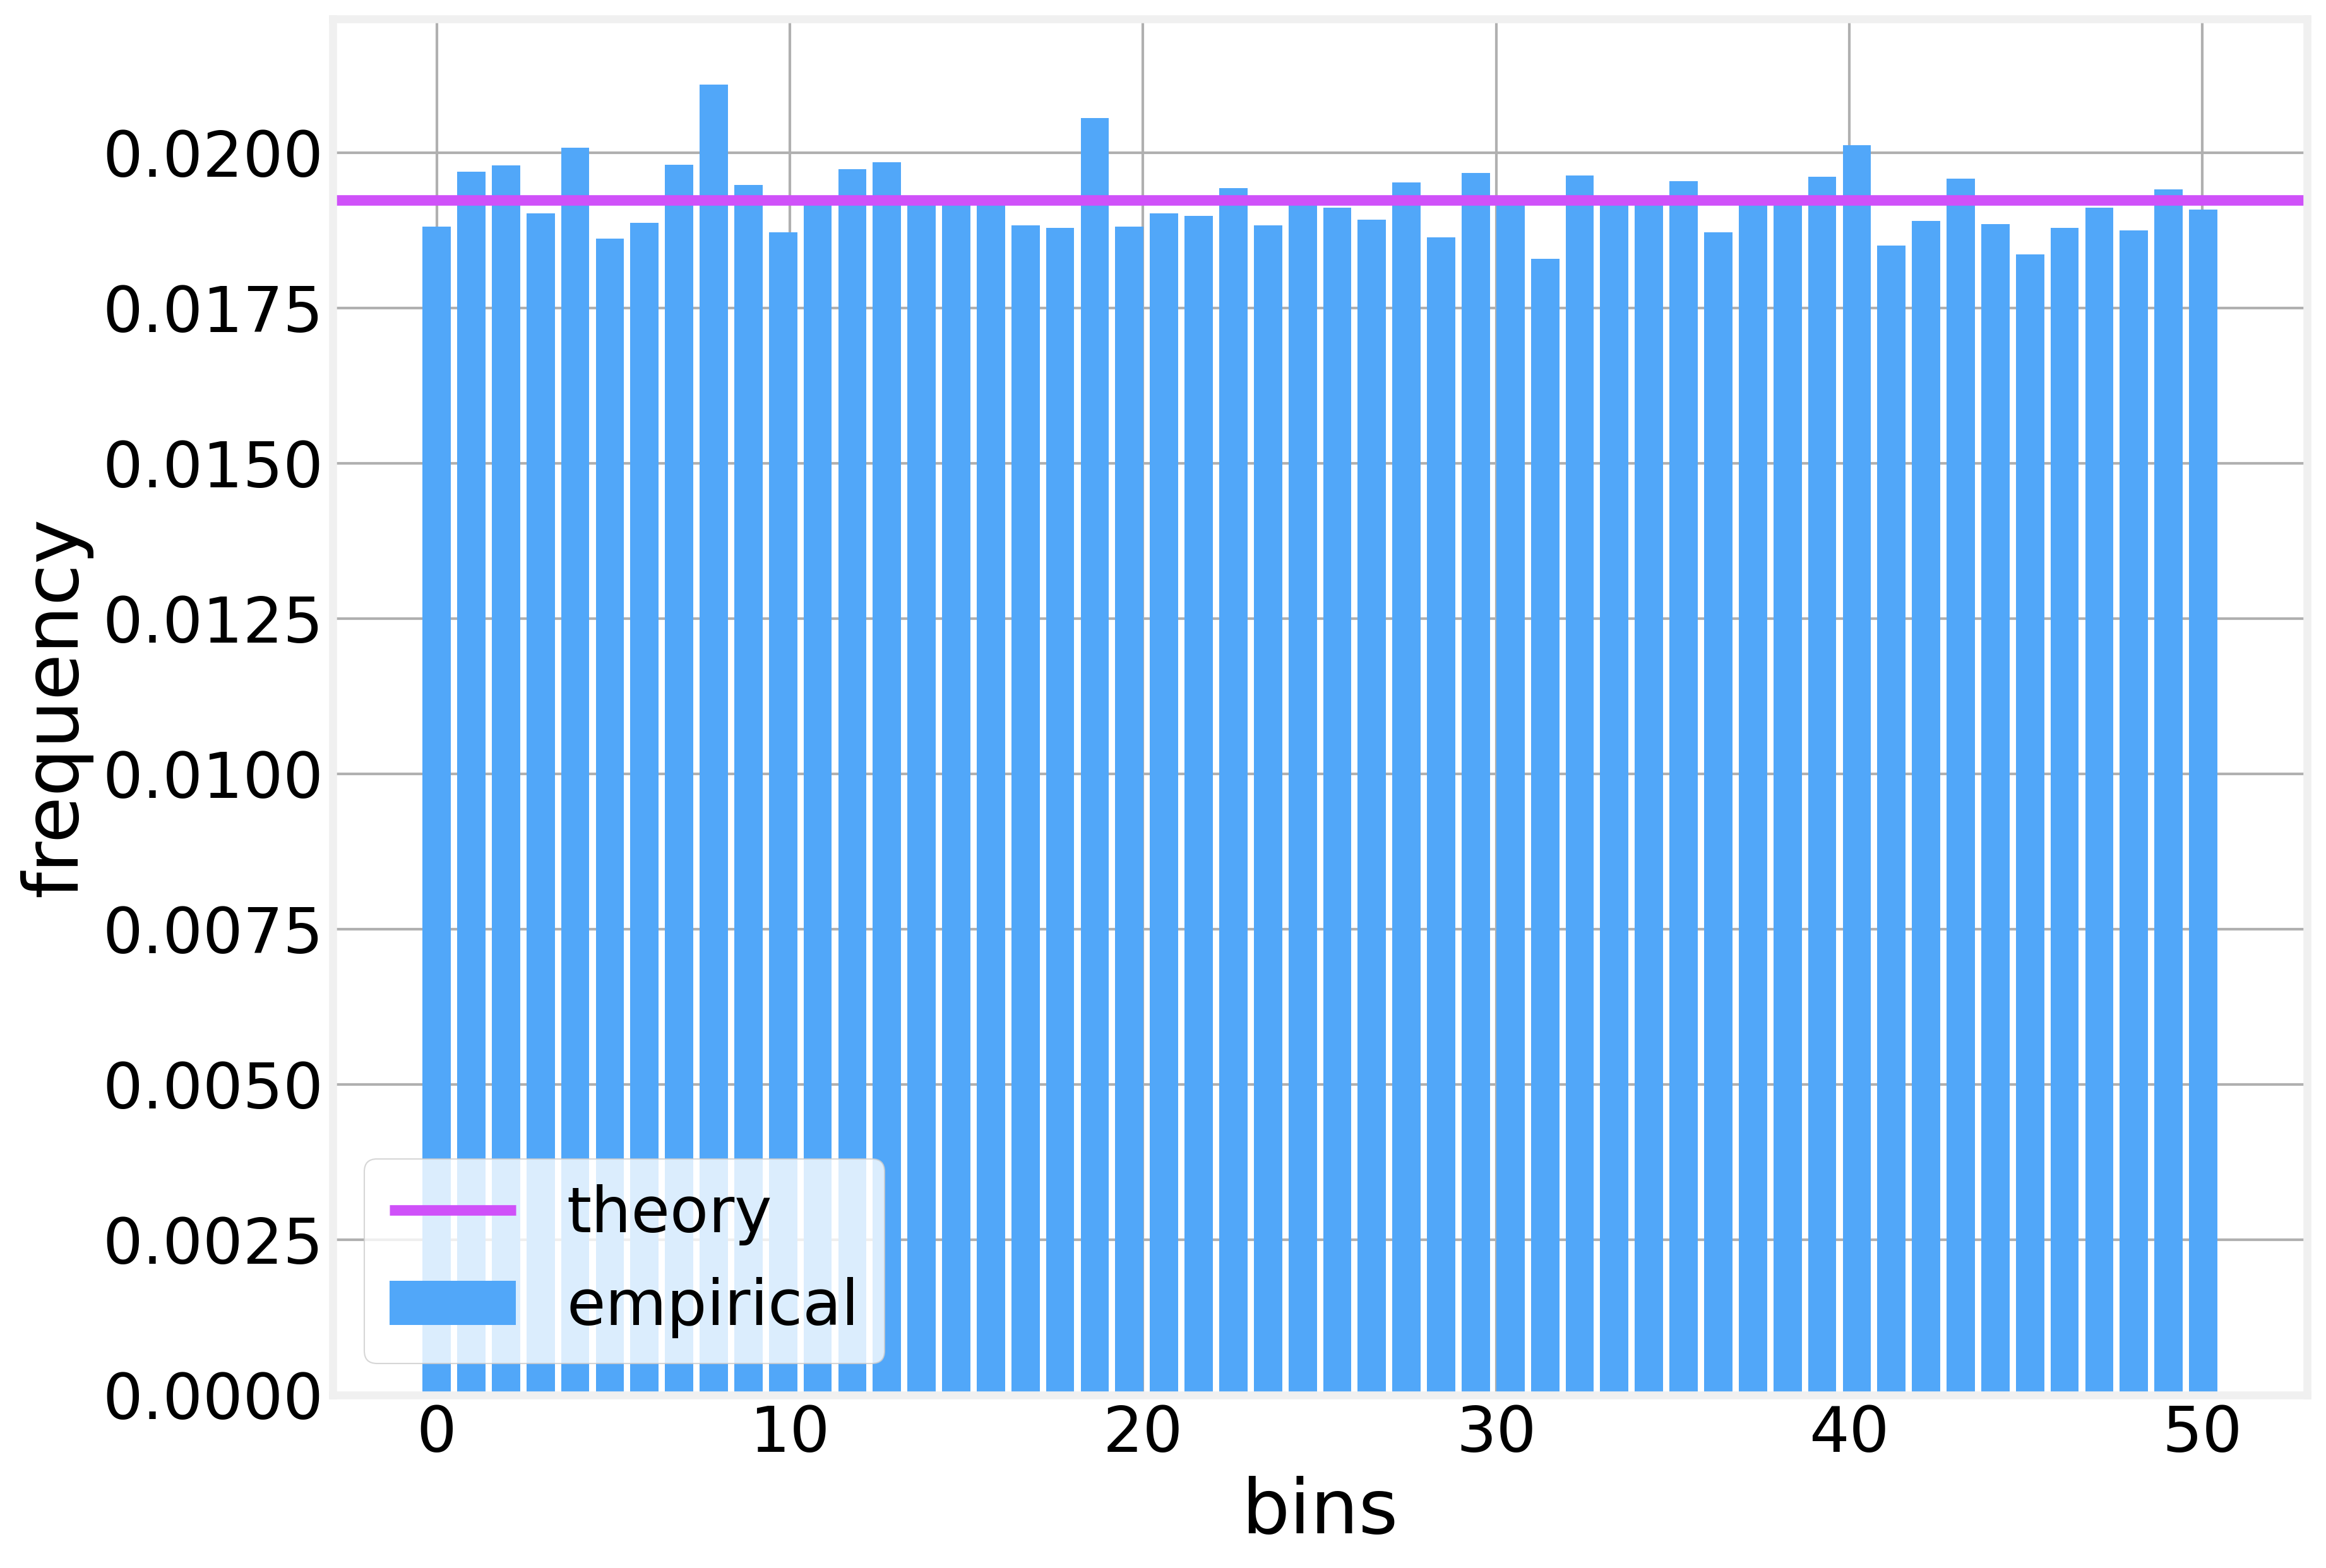

In [6]:
fig, ax = plt.subplots(1)
ax.bar(bin_edges[:-1], counts/cards.shape[0], label='empirical')
ax.axhline(1/52, color=colors[1], label='theory')
ax.set_xlabel('bins')
ax.set_ylabel('frequency')
ax.legend()

### Continuous version

We're going to throw 10,000 darts at a unit square and see how many fall within the quarter circle

In [7]:
darts = np.random.random((100_000, 2))

In [8]:
darts[:10]

array([[0.69973971, 0.20106809],
       [0.21199269, 0.11236886],
       [0.04839943, 0.21355133],
       [0.49445195, 0.58222448],
       [0.10181833, 0.74075448],
       [0.44286558, 0.51264069],
       [0.60448701, 0.63668721],
       [0.64033154, 0.24652469],
       [0.8341039 , 0.8774564 ],
       [0.59986169, 0.93538174]])

In [9]:
radius = np.sqrt(np.power(darts, 2).sum(axis=1))

The darts that land at a distance of 1 or less from the origin are inside the circle

In [10]:
inside = radius <= 1

We have roughly 78,000 of those:

In [11]:
len(darts[inside])

78663

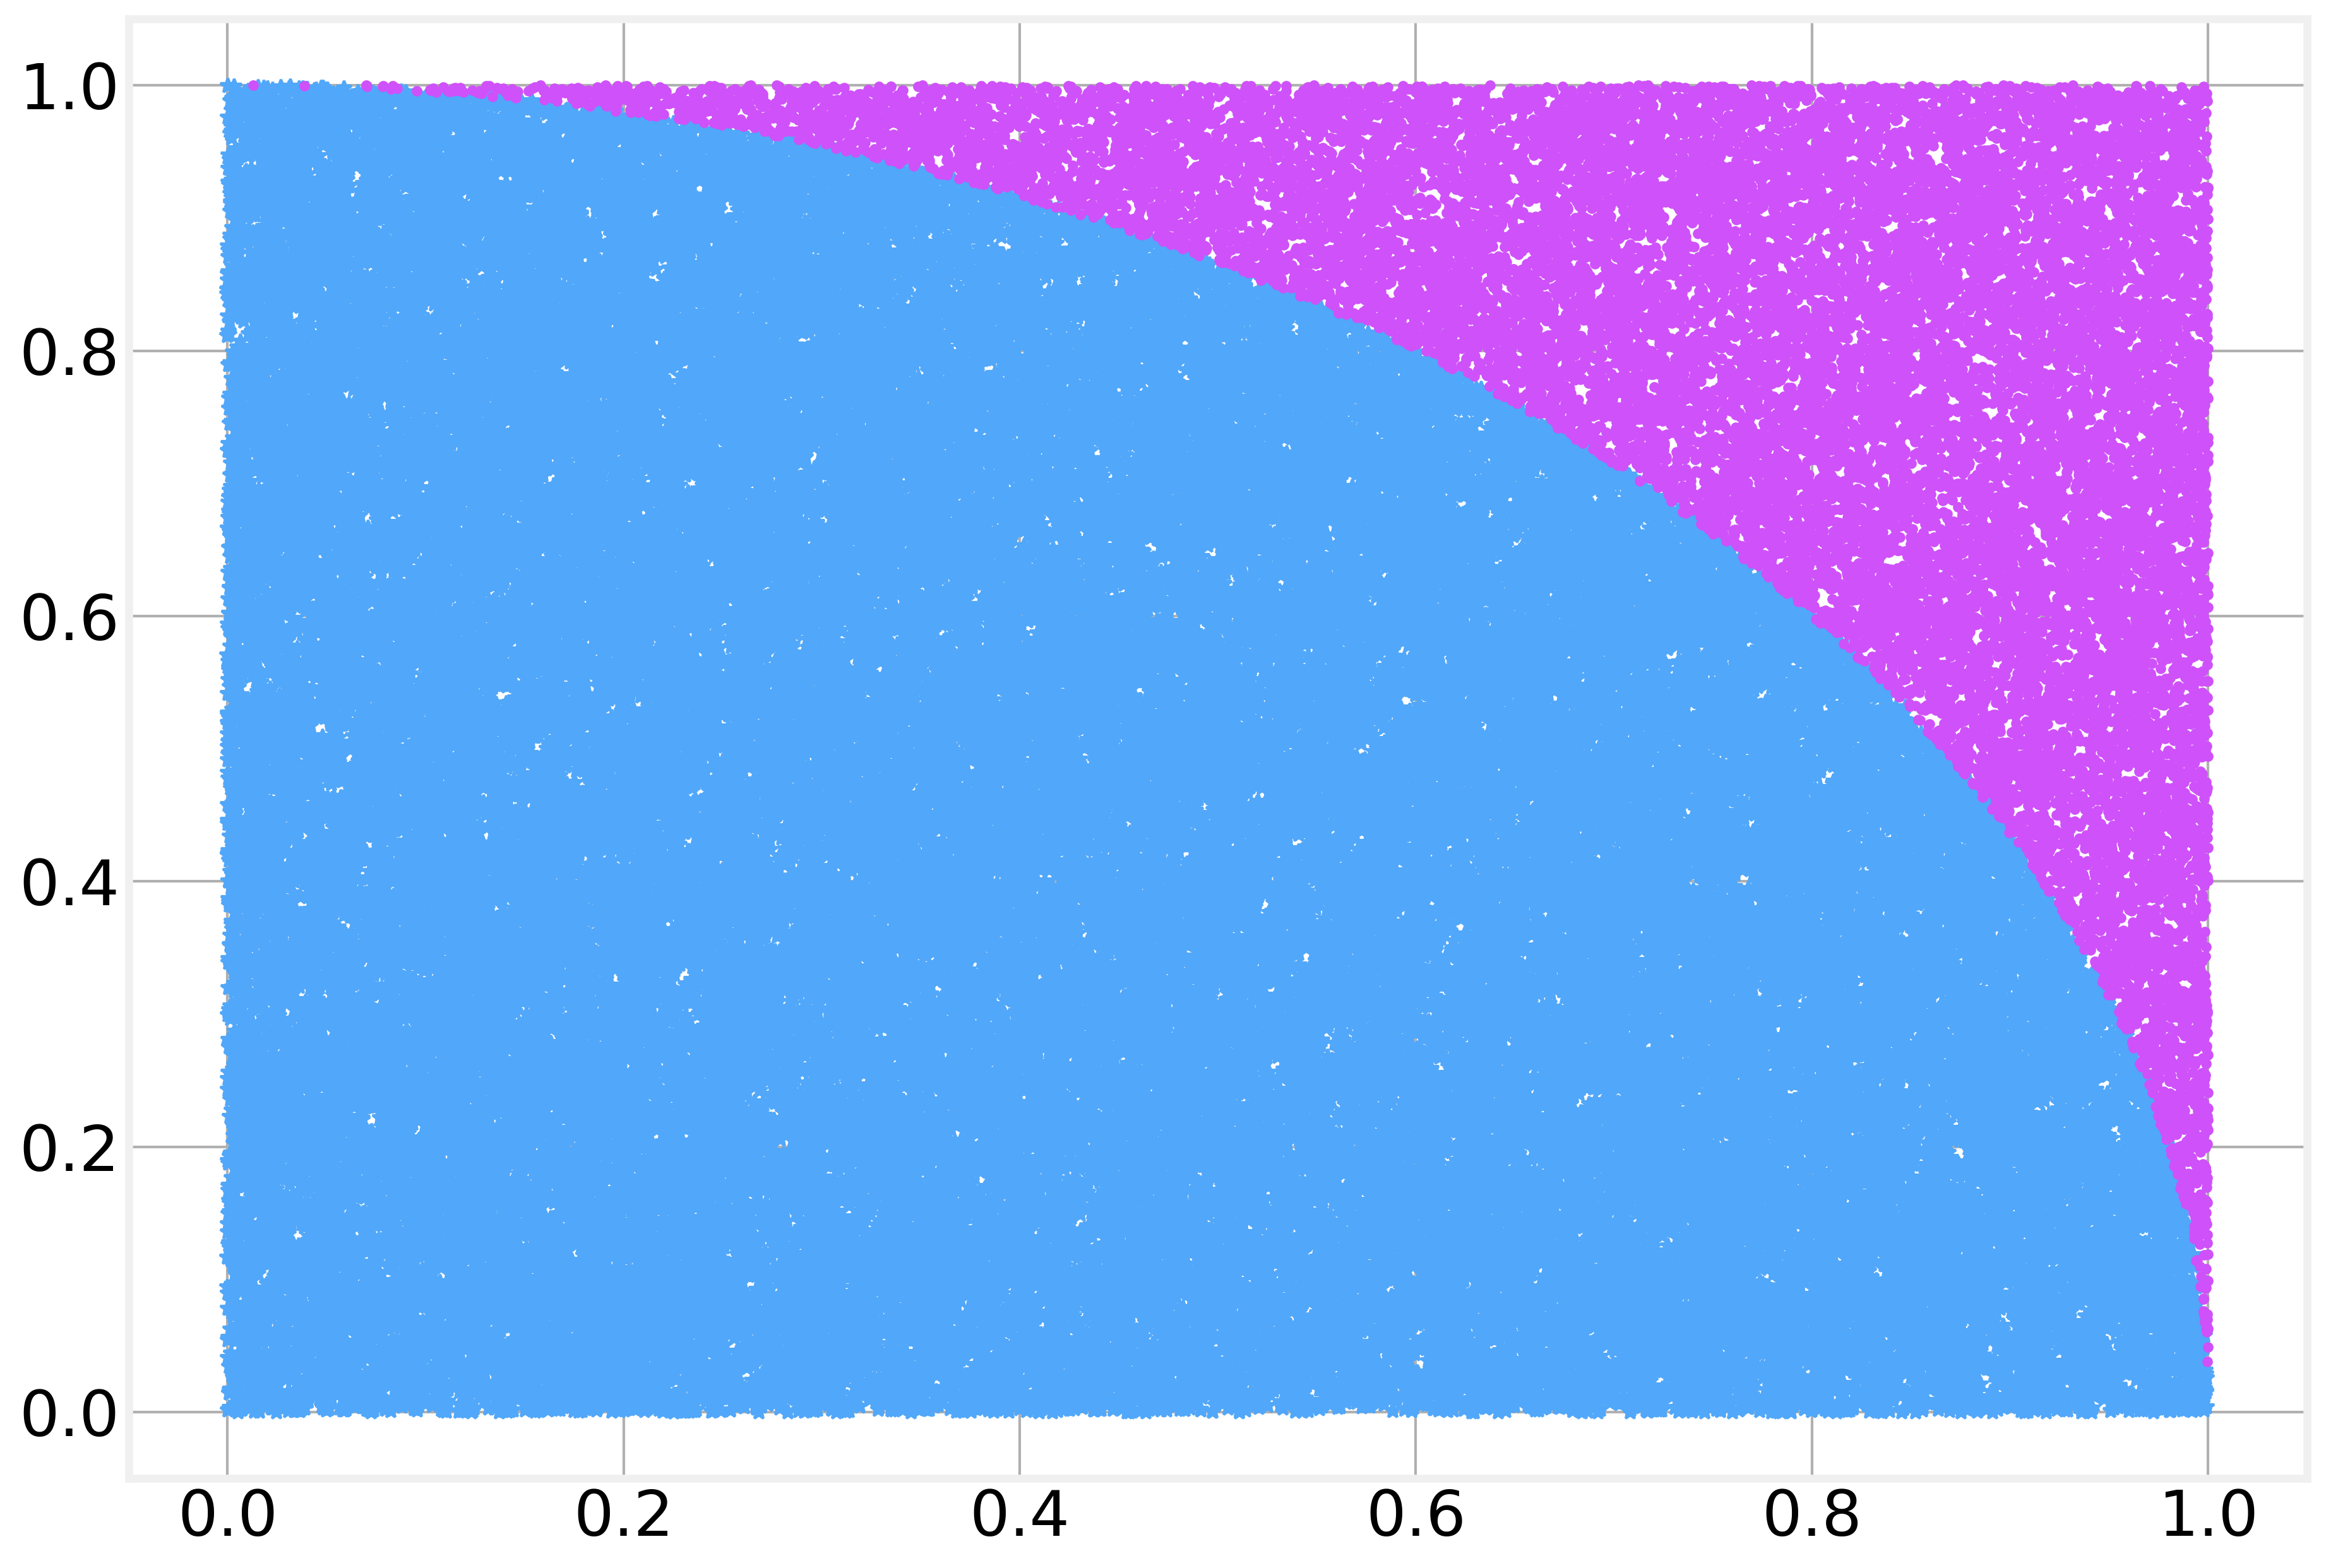

In [12]:
plt.plot(darts[inside].T[0], darts[inside].T[1], '*')
plt.plot(darts[~inside].T[0], darts[~inside].T[1], '.')

All others land outside. The ratio between the two is:

In [13]:
len(darts[inside])/len(darts)

0.78663

which give us a rough approximation to the measurement of $\pi/4\sim0.7853$. Naturally, throwing more darts would provide a better estimate. This technique is known as Monte-Carlo Integration and is very commonly used when we're interested in estimating values of complex functions

# Binomial Distribution

Text(0.5, 1.0, 'Binomial Distribution')

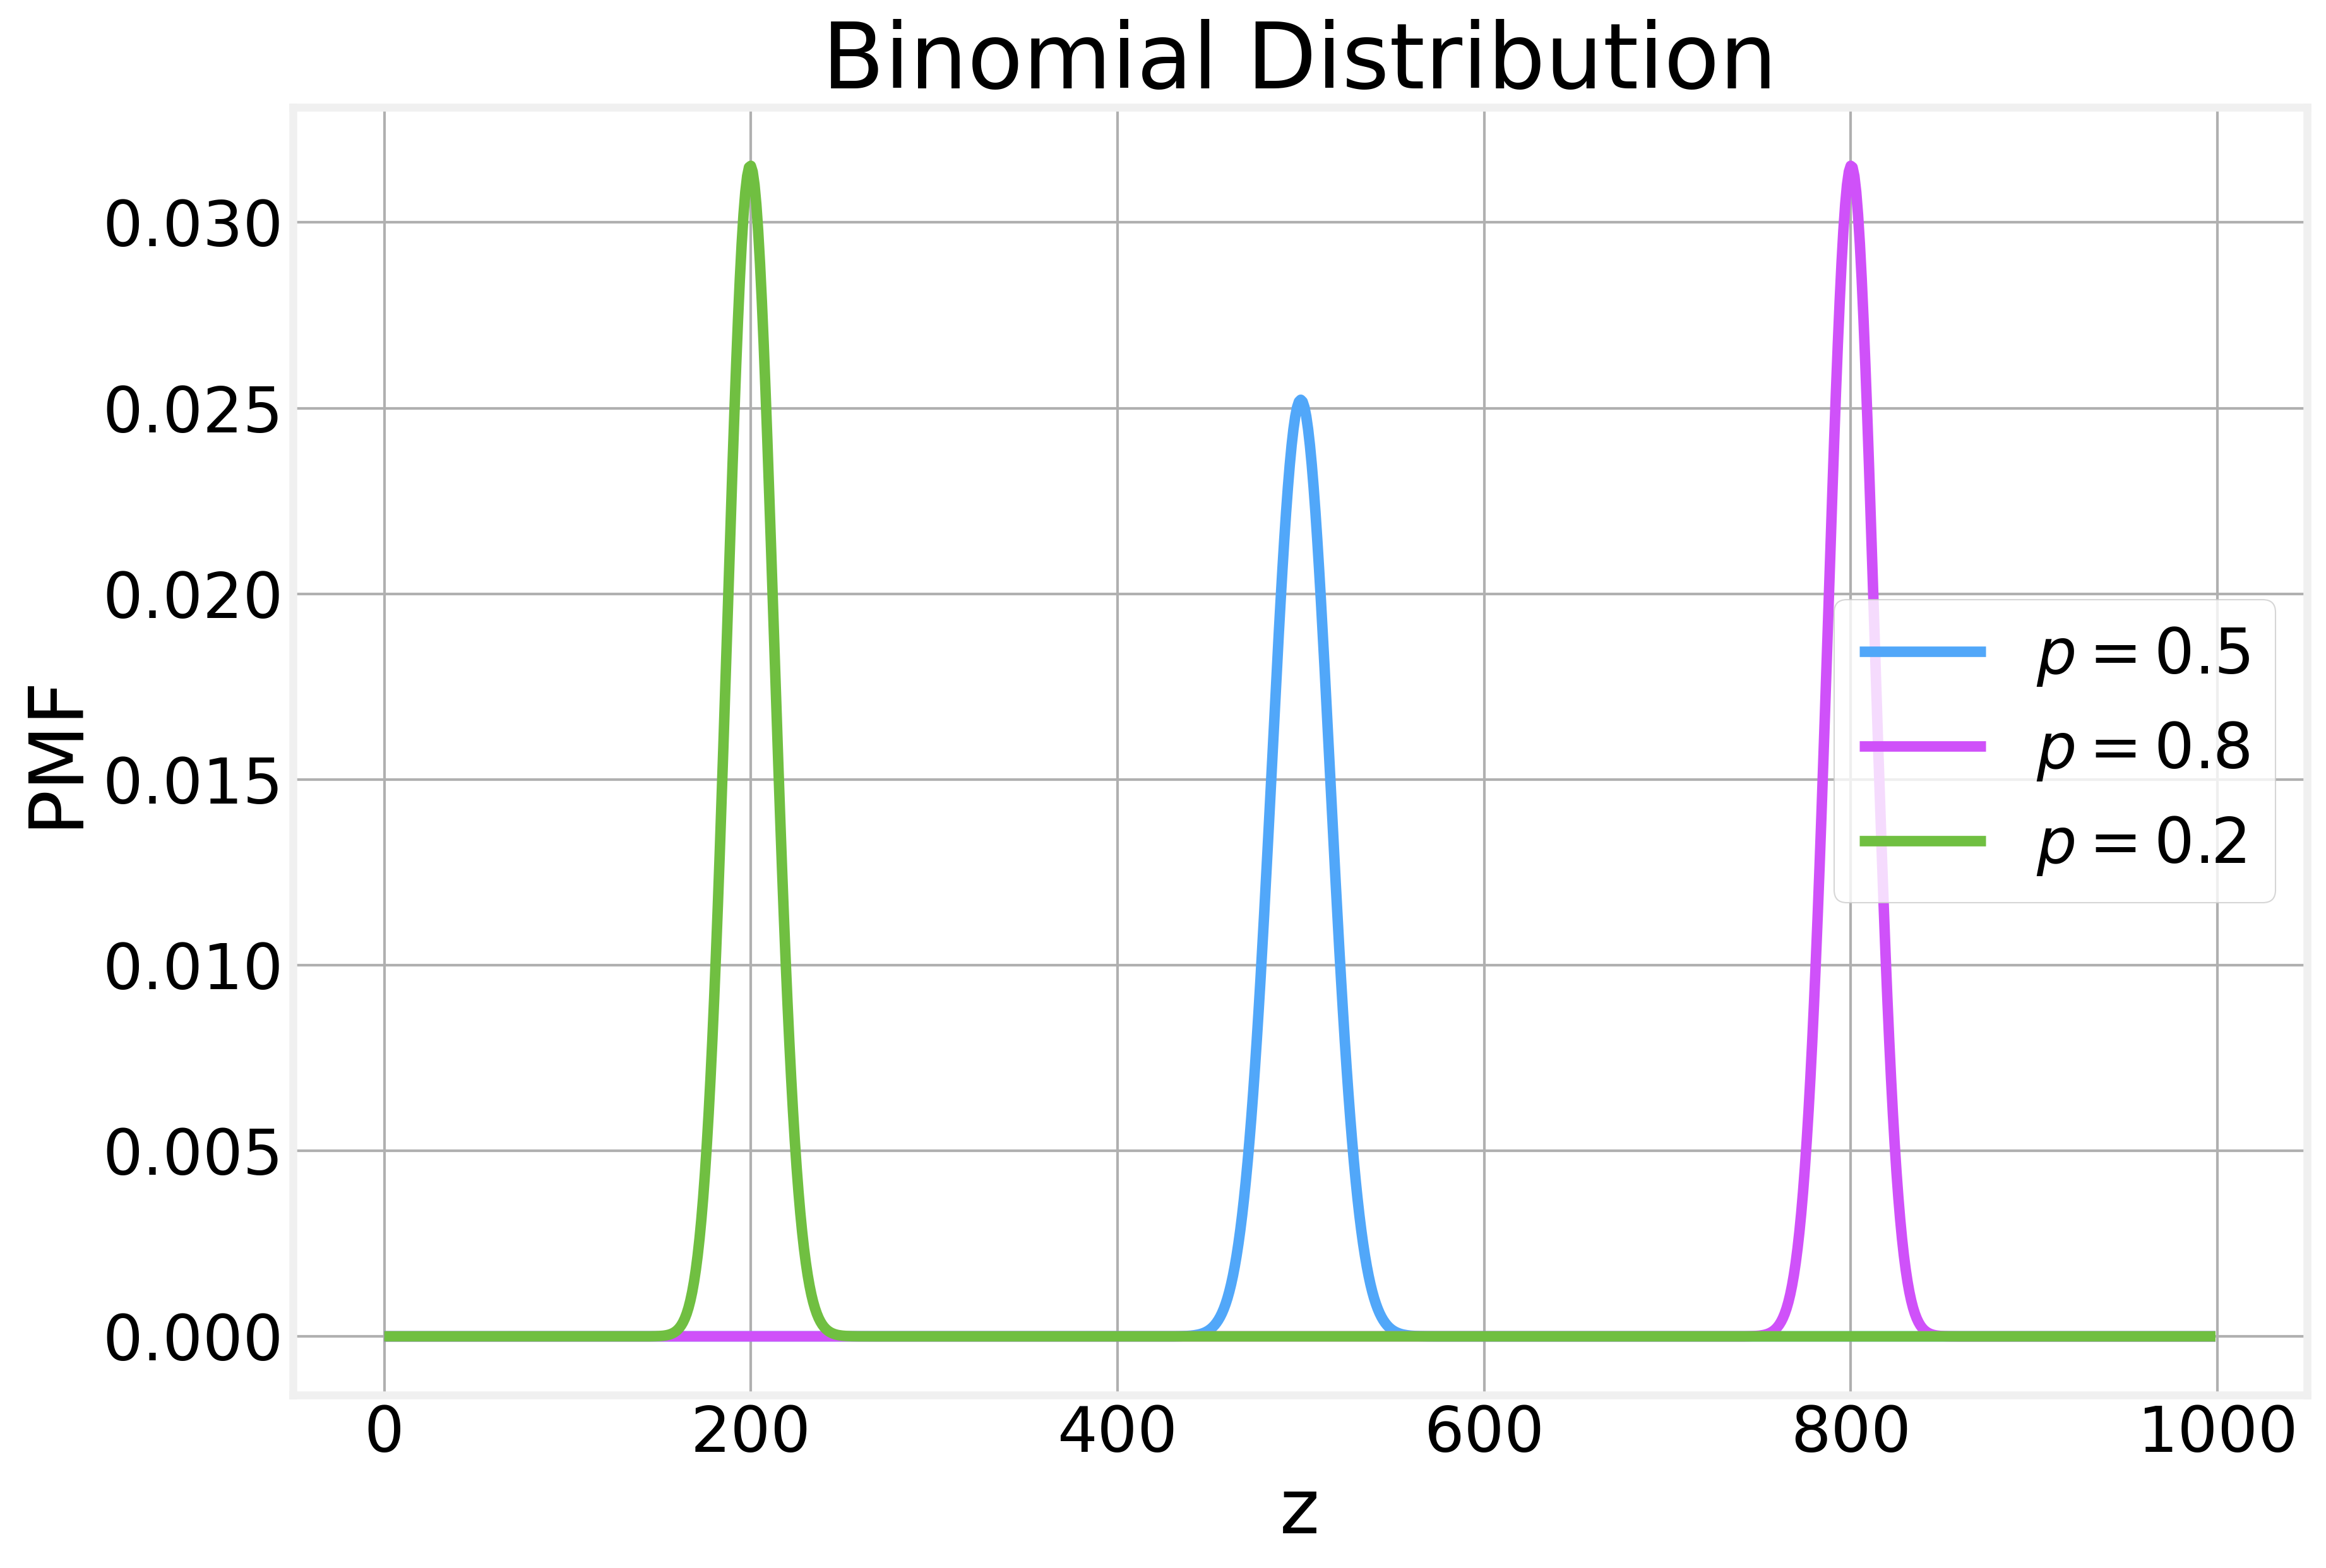

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.5).pmf(x)
ax.plot(x, y, label=r'$p=0.5$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.8).pmf(x)
ax.plot(x, y, label=r'$p=0.8$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.2).pmf(x)
ax.plot(x, y, label=r'$p=0.2$')
plt.legend()
plt.title('Binomial Distribution')

Contrarily to what we saw with the Gaussian distribution, the variance of the binomial depends on the value of N. We illustrate this by plotting the distribution obtained with the same value of $p$ but different values of $N$. We recenter the plots by subtracting the mean for ease of visualization

Text(0.5, 1.0, 'Binomial Distribution')

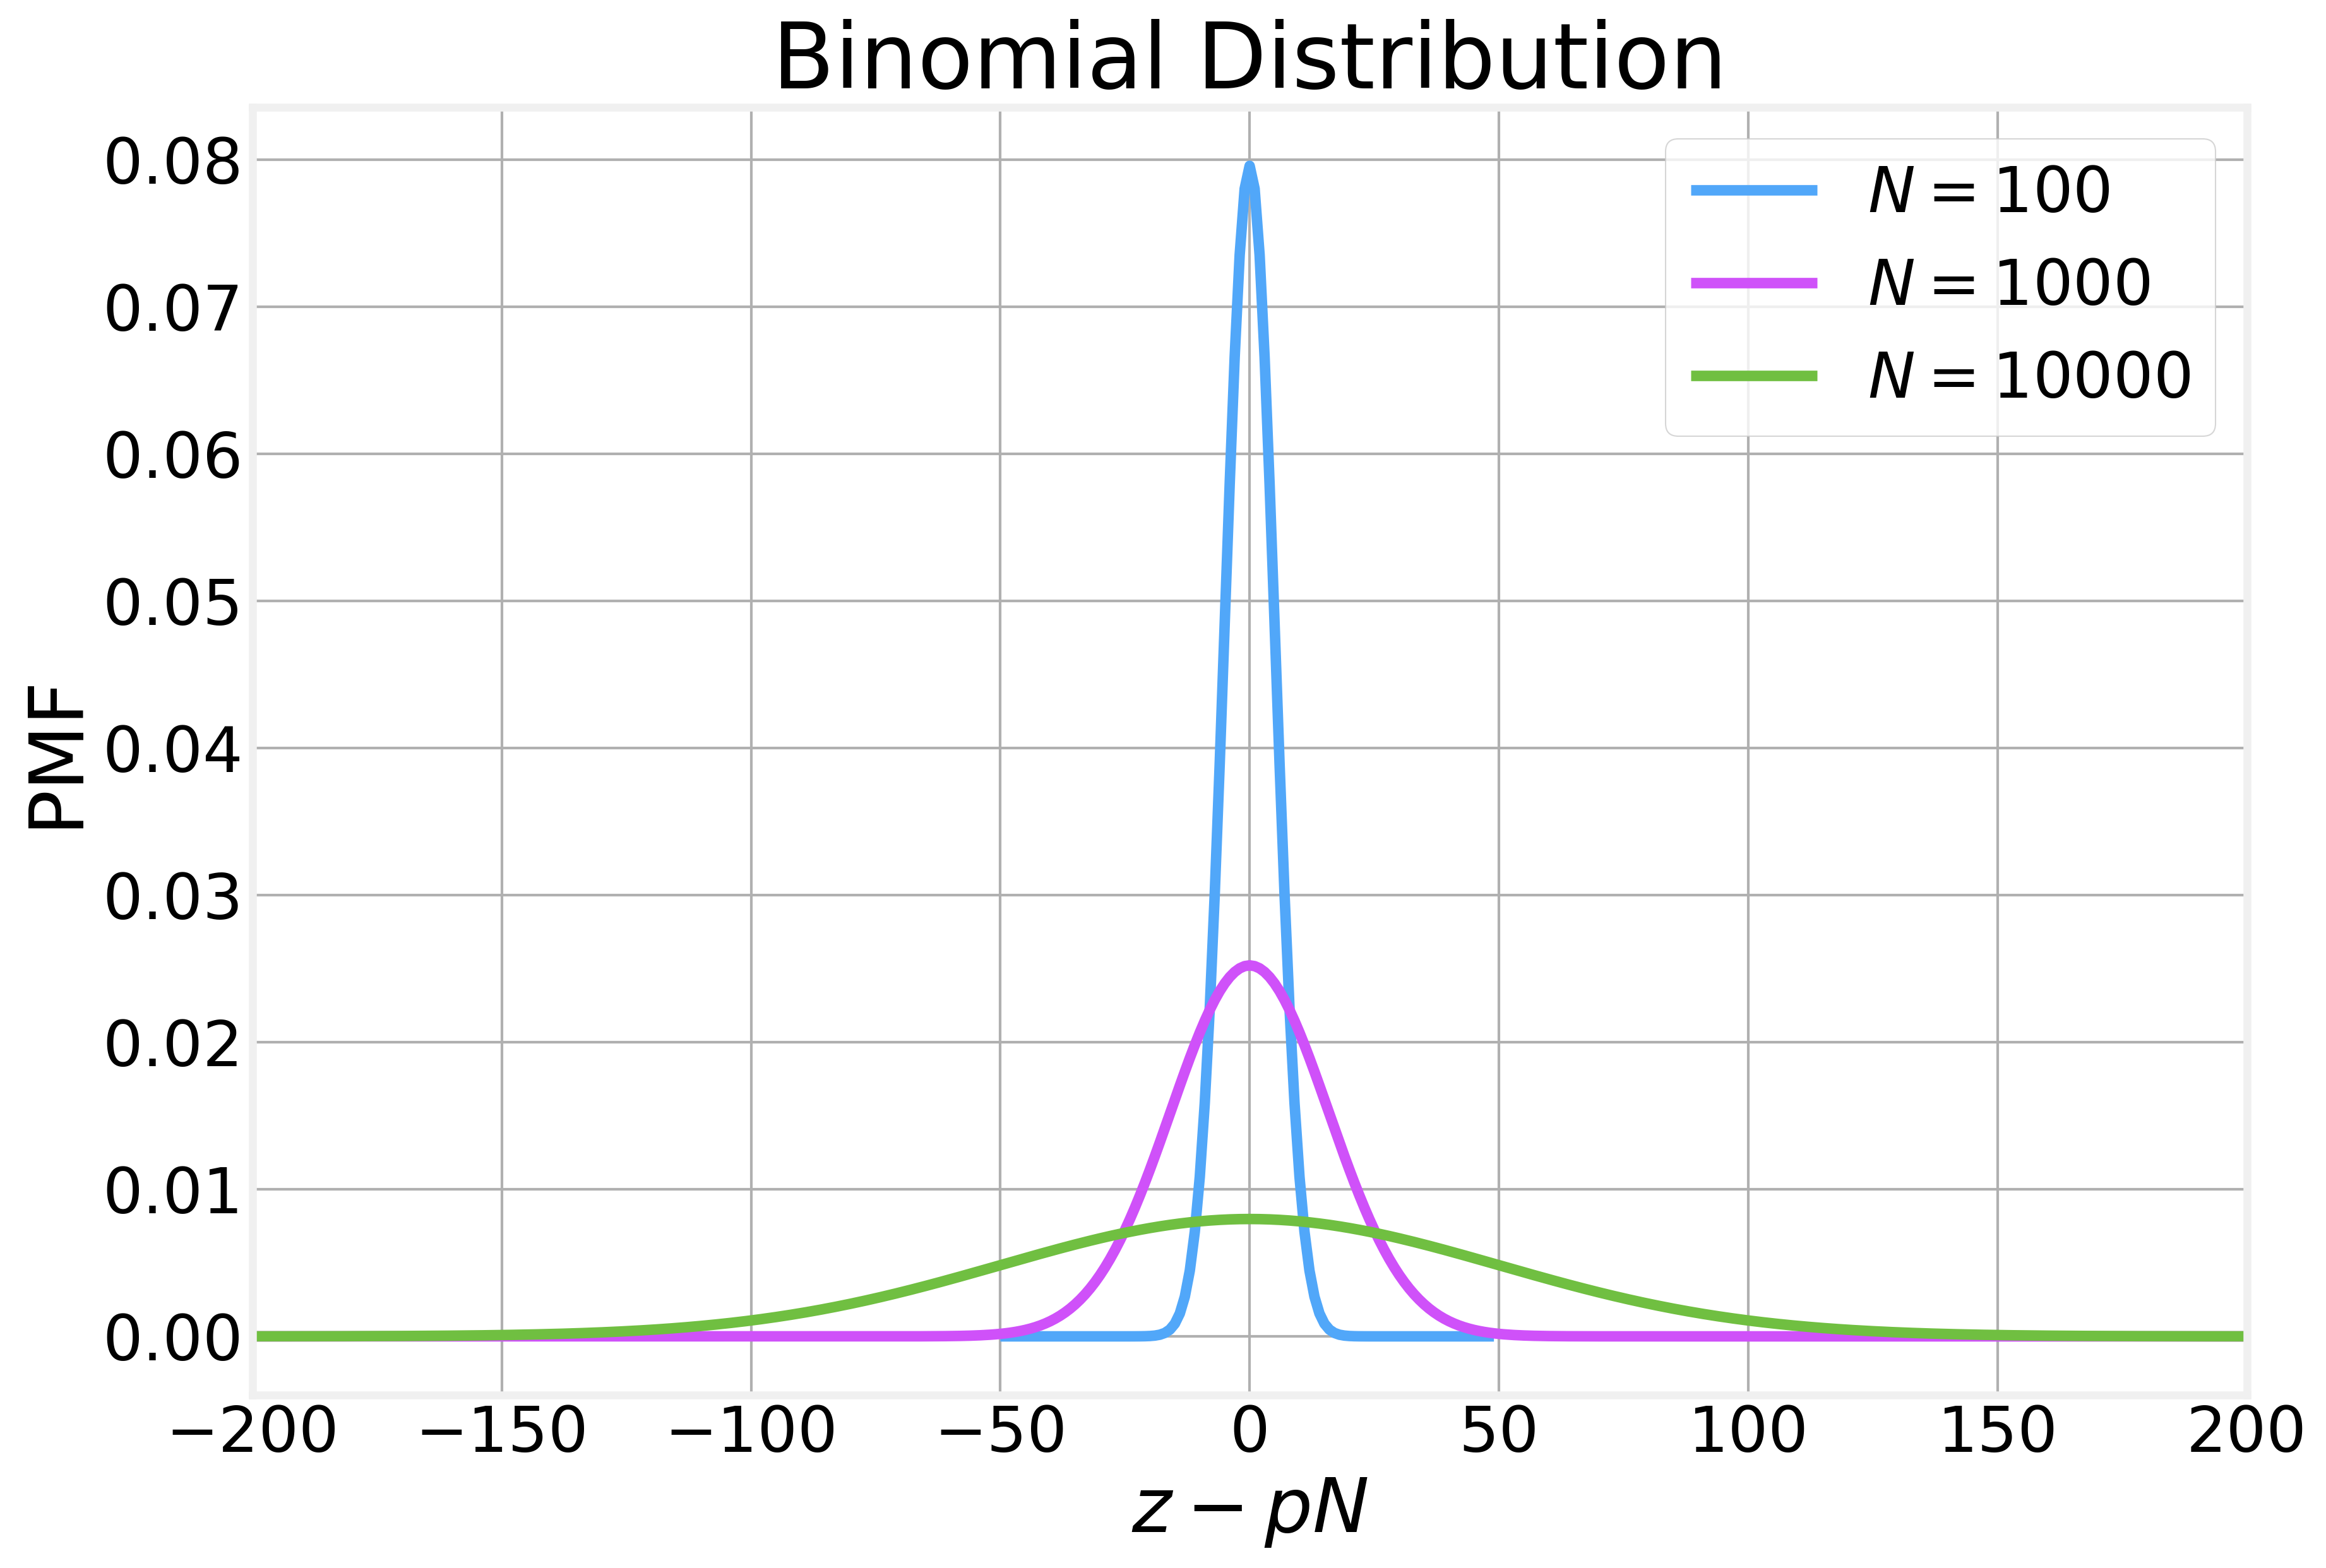

In [15]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r'$z-pN$')
ax.set_ylabel('PMF')

x = np.arange(0, 100)
y = stats.binom(100, 0.5).pmf(x)
ax.plot(x-50, y, label=r'$N=100$')

x = np.arange(0, 1000)
y = stats.binom(1_000, 0.5).pmf(x)
ax.plot(x-500, y, label=r'$N=1000$')

x = np.arange(0, 10000)
y = stats.binom(10_000, 0.5).pmf(x)
ax.plot(x-5000, y, label=r'$N=10000$')
ax.set_xlim(-200, 200)
plt.legend()
plt.title('Binomial Distribution')

# Gaussian Distribution

Text(0.5, 1.0, 'Gaussian Distribution')

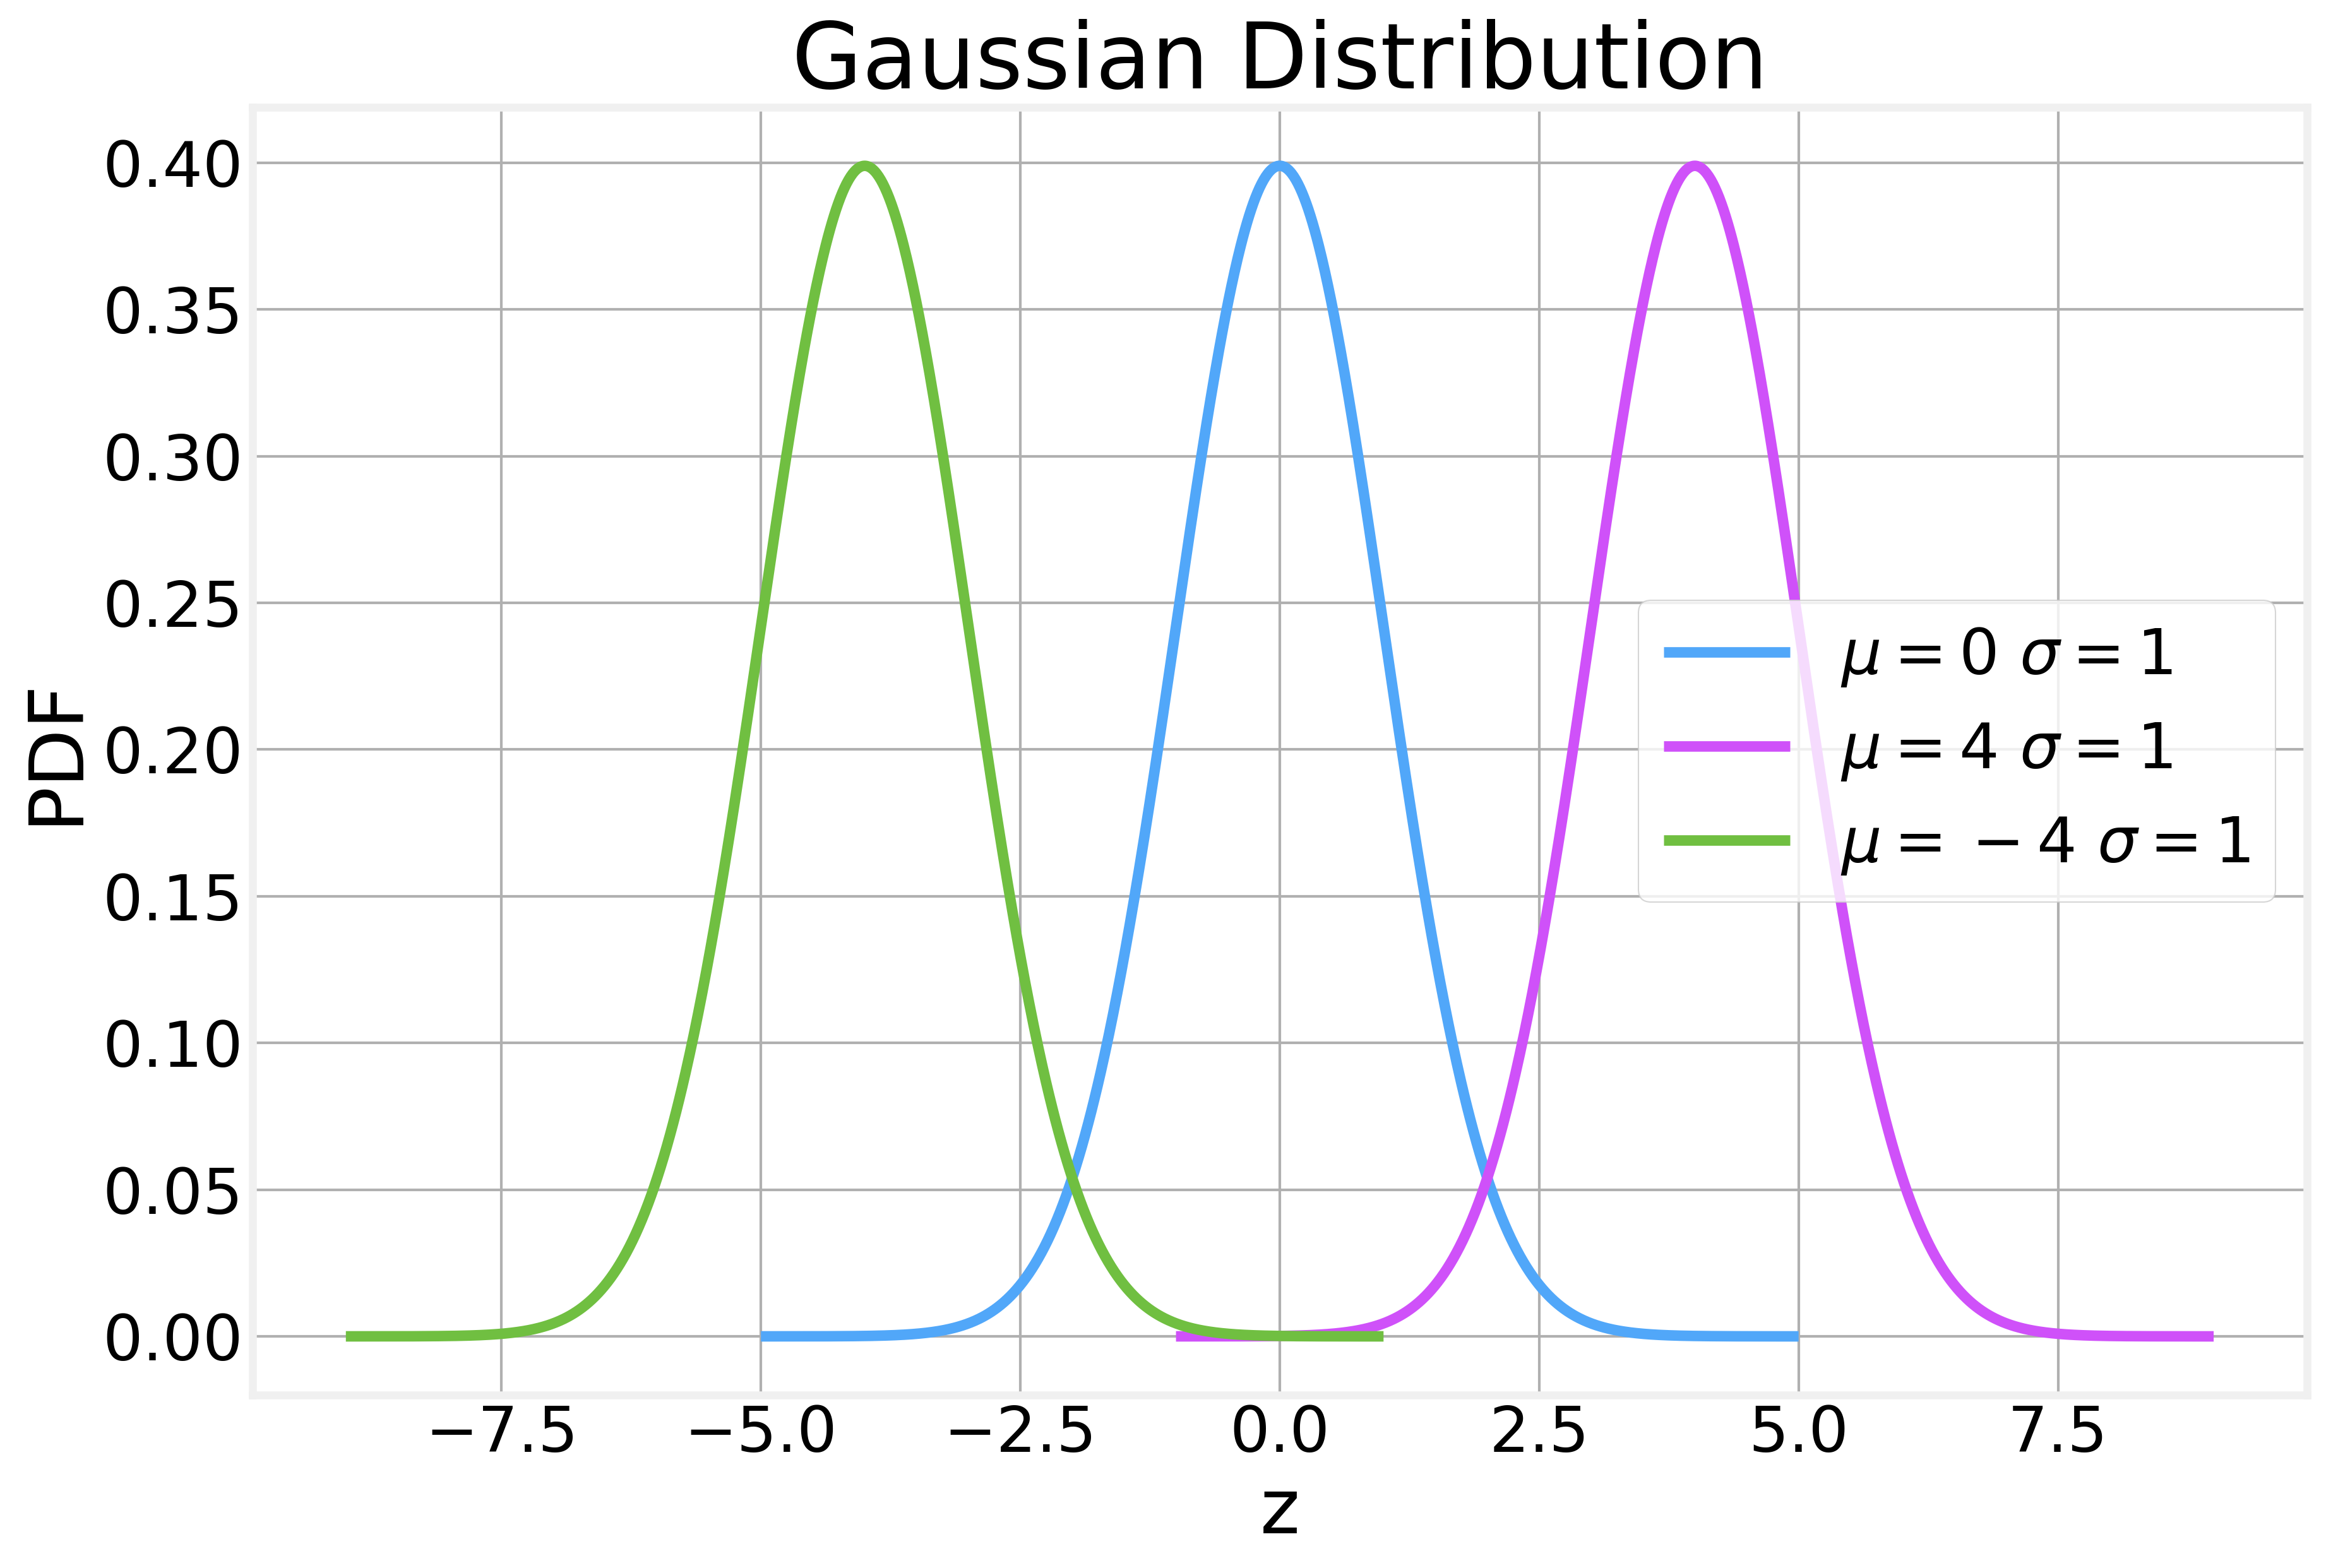

In [16]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PDF')

x = np.linspace(-5, 5, 1000)
y = stats.norm(loc=0, scale=1).pdf(x)
ax.plot(x, y, label=r'$\mu=0~ \sigma=1$')

x = np.linspace(-1, 9, 1000)
y = stats.norm(loc=4, scale=1).pdf(x)
ax.plot(x, y, label=r'$\mu=4~ \sigma=1$')

x = np.linspace(-9, 1, 1000)
y = stats.norm(loc=-4, scale=1).pdf(x)
ax.plot(x, y, label=r'$\mu=-4~\sigma=1$')
plt.legend()
plt.title('Gaussian Distribution')

Text(0.5, 1.0, 'Gaussian Distribution')

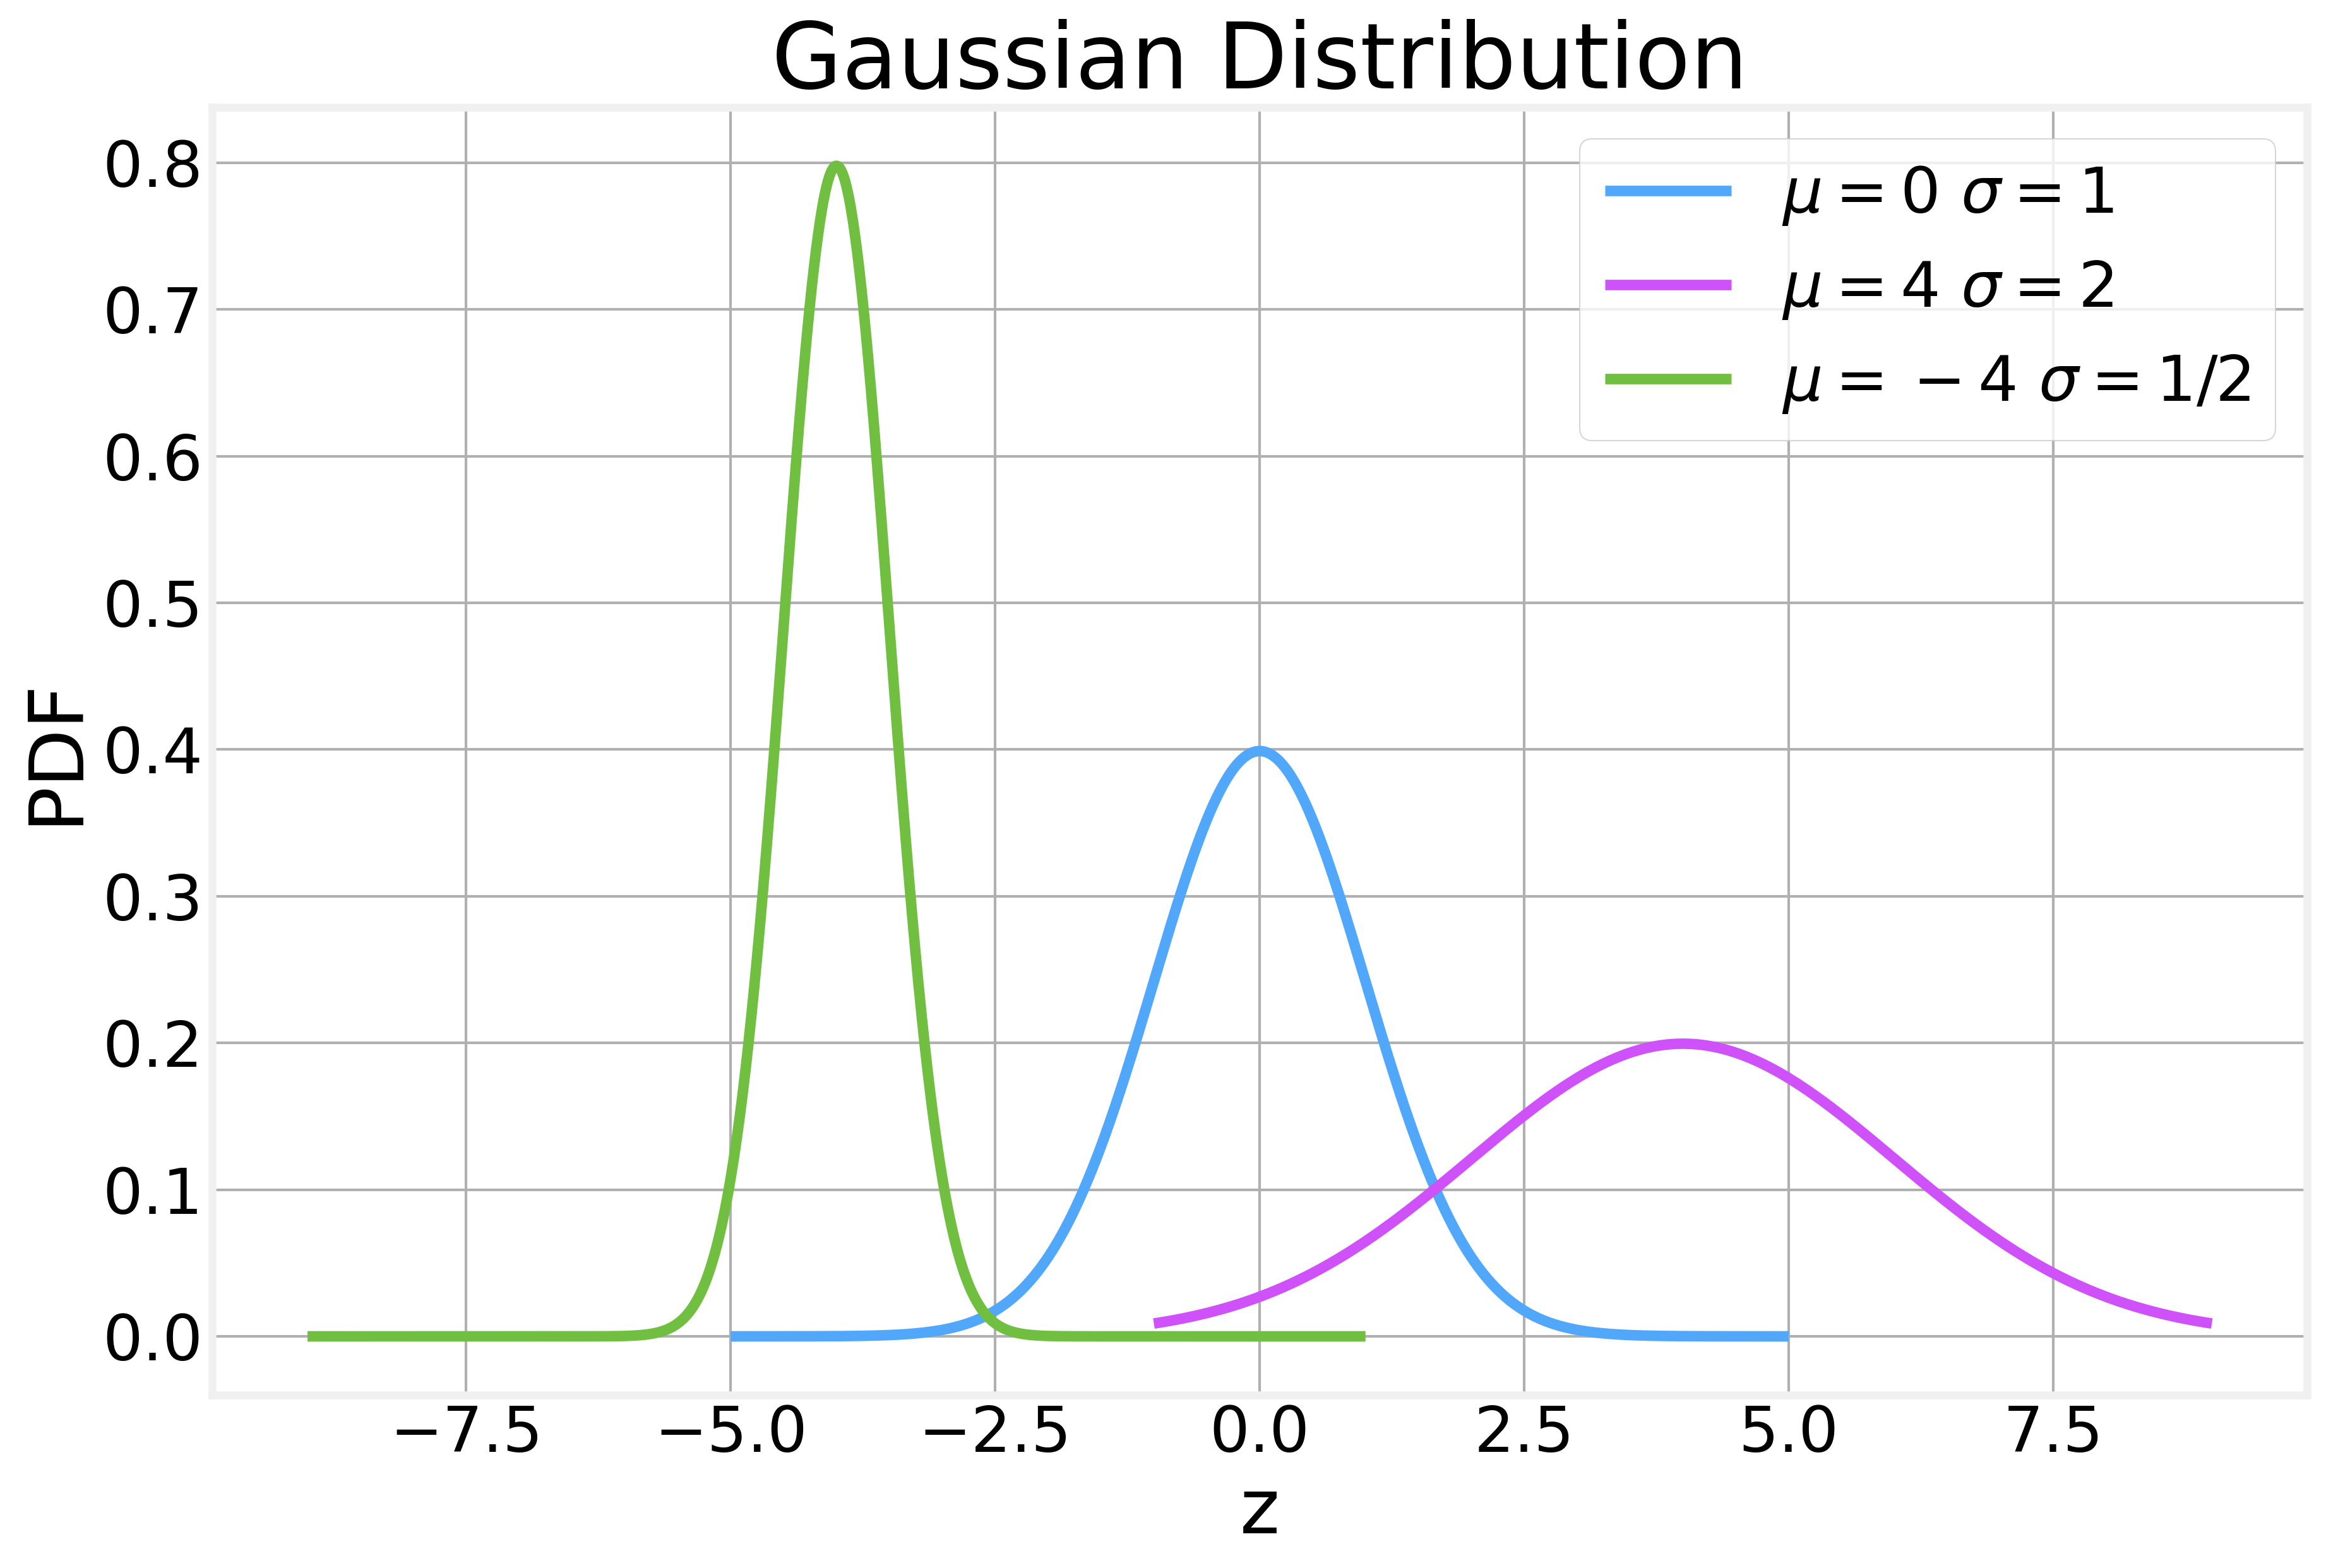

In [17]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PDF')

x = np.linspace(-5, 5, 1000)
y = stats.norm().pdf(x)
ax.plot(x, y, label=r'$\mu=0~ \sigma=1$')

x = np.linspace(-1, 9, 1000)
y = stats.norm(loc=4, scale=2).pdf(x)
ax.plot(x, y, label=r'$\mu=4~ \sigma=2$')

x = np.linspace(-9, 1, 1000)
y = stats.norm(loc=-4, scale=.5).pdf(x)
ax.plot(x, y, label=r'$\mu=-4~\sigma=1/2$')
plt.legend()
plt.title('Gaussian Distribution')

# Poisson Distribution

Text(0.5, 1.0, 'Poisson Distribution')

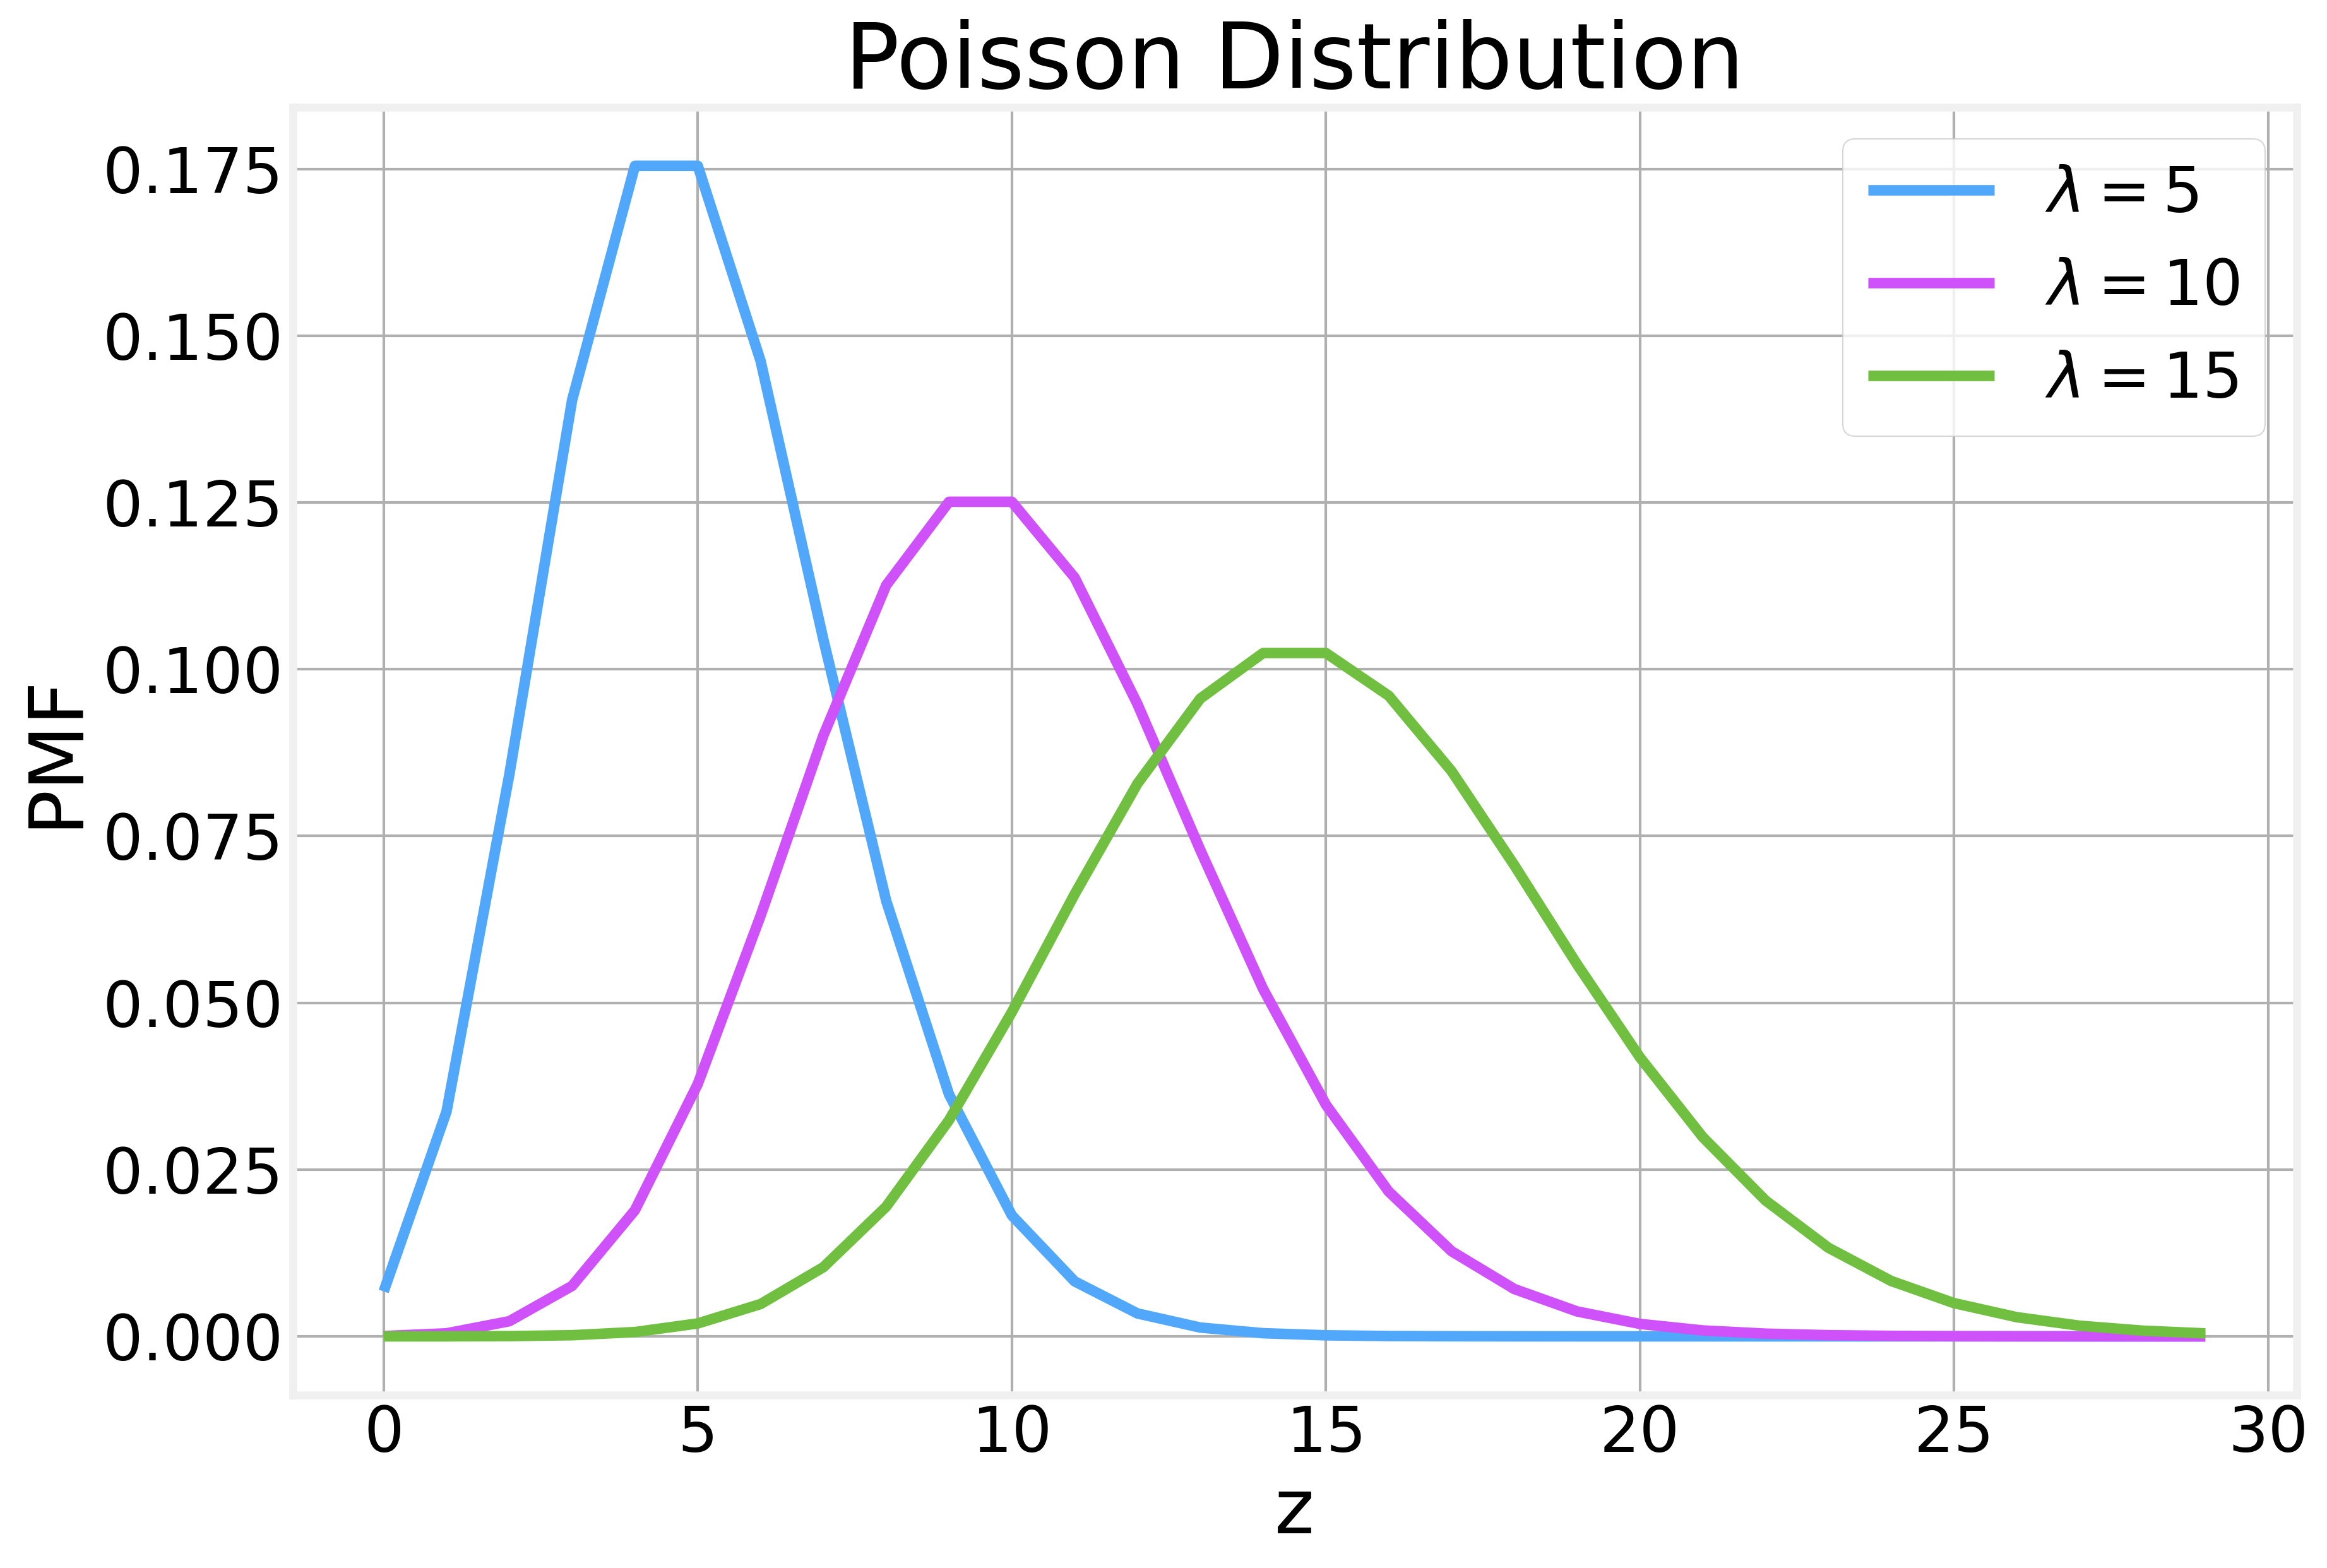

In [18]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 30)
y = stats.poisson(5).pmf(x)
ax.plot(x, y, label=r'$\lambda=5$')

x = np.arange(0, 30)
y = stats.poisson(10).pmf(x)
ax.plot(x, y, label=r'$\lambda=10$')

x = np.arange(0, 30)
y = stats.poisson(15).pmf(x)
ax.plot(x, y, label=r'$\lambda=15$')
ax.legend()
ax.set_title('Poisson Distribution')

(-25.0, 25.0)

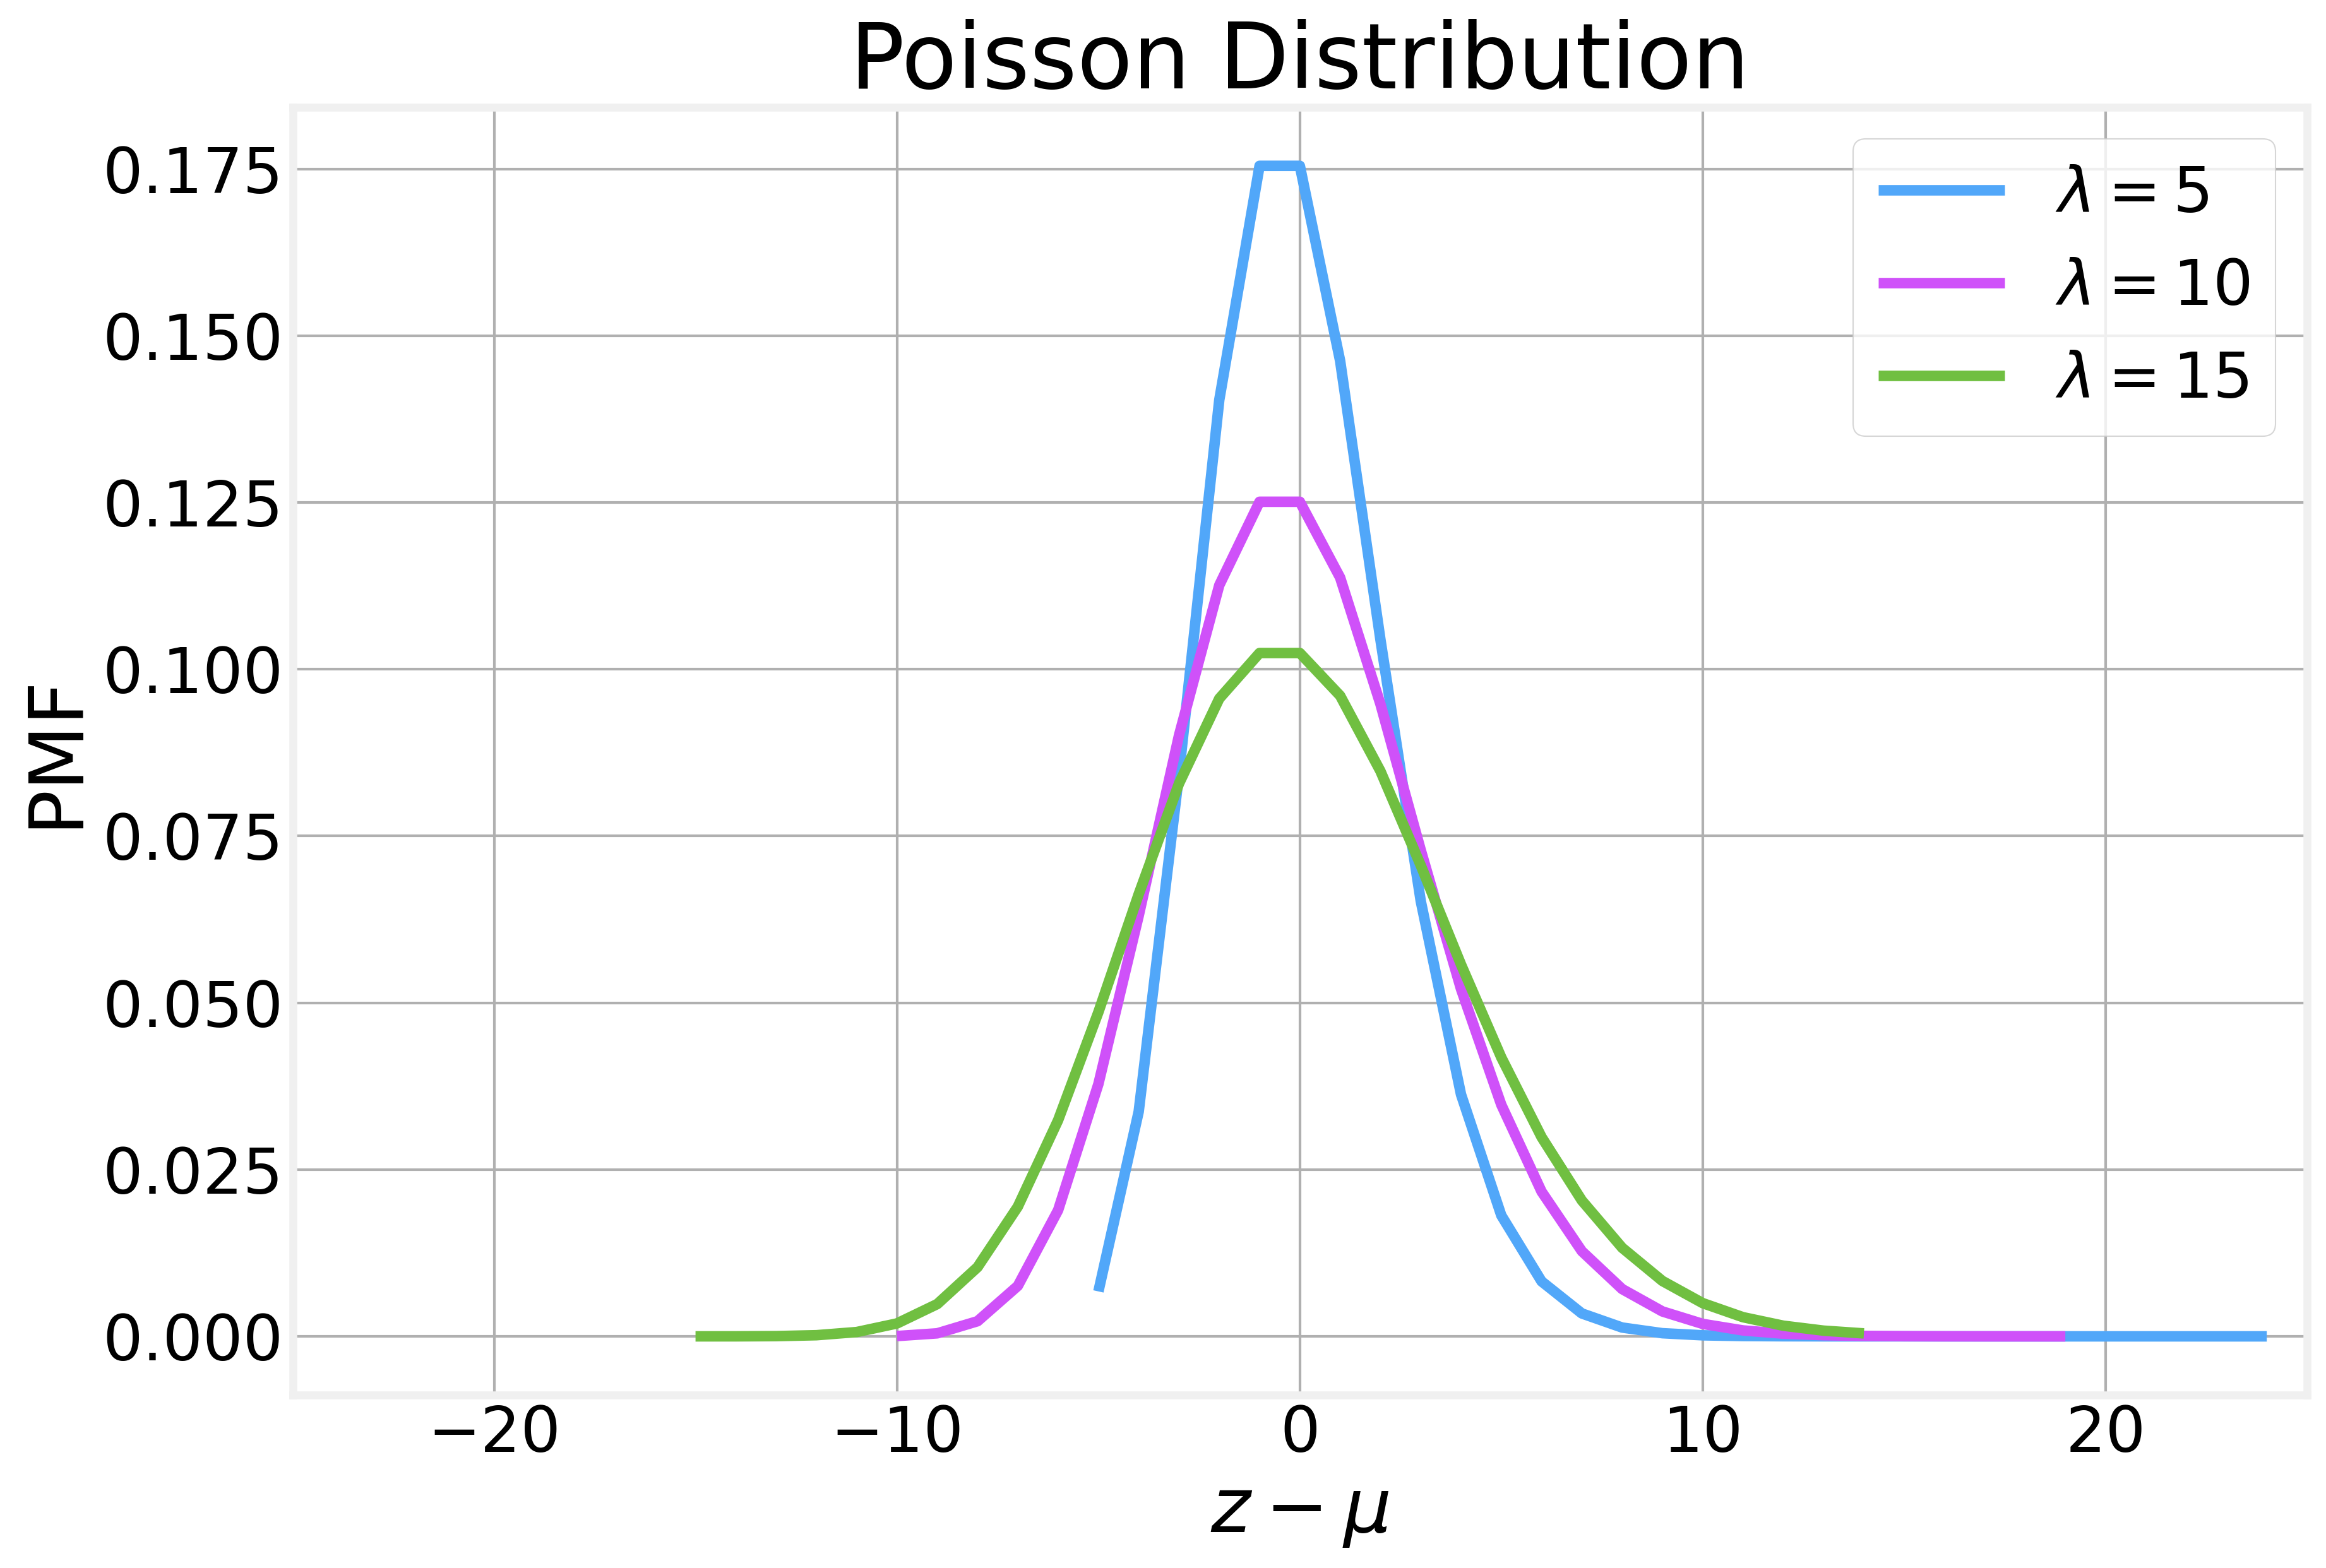

In [19]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r'$z-\mu$')
ax.set_ylabel('PMF')

x = np.arange(0, 30)
y = stats.poisson(5).pmf(x)
ax.plot(x-5, y, label=r'$\lambda=5$')

x = np.arange(0, 30)
y = stats.poisson(10).pmf(x)
ax.plot(x-10, y, label=r'$\lambda=10$')

x = np.arange(0, 30)
y = stats.poisson(15).pmf(x)
ax.plot(x-15, y, label=r'$\lambda=15$')
ax.legend()
ax.set_title('Poisson Distribution')
ax.set_xlim(-25,25)

# Generating probability distributions

Given an arbitrary (possibly empirical) probability distribution, can we generate values that are distributed accordingly? Let's consider a simple example:

In [20]:
dist = np.array([[1, 1/6],
                 [2, 1/6],
                 [3, 2/6],
                 [4, 1/6],
                 [5, 1/6]], dtype='float')

<BarContainer object of 5 artists>

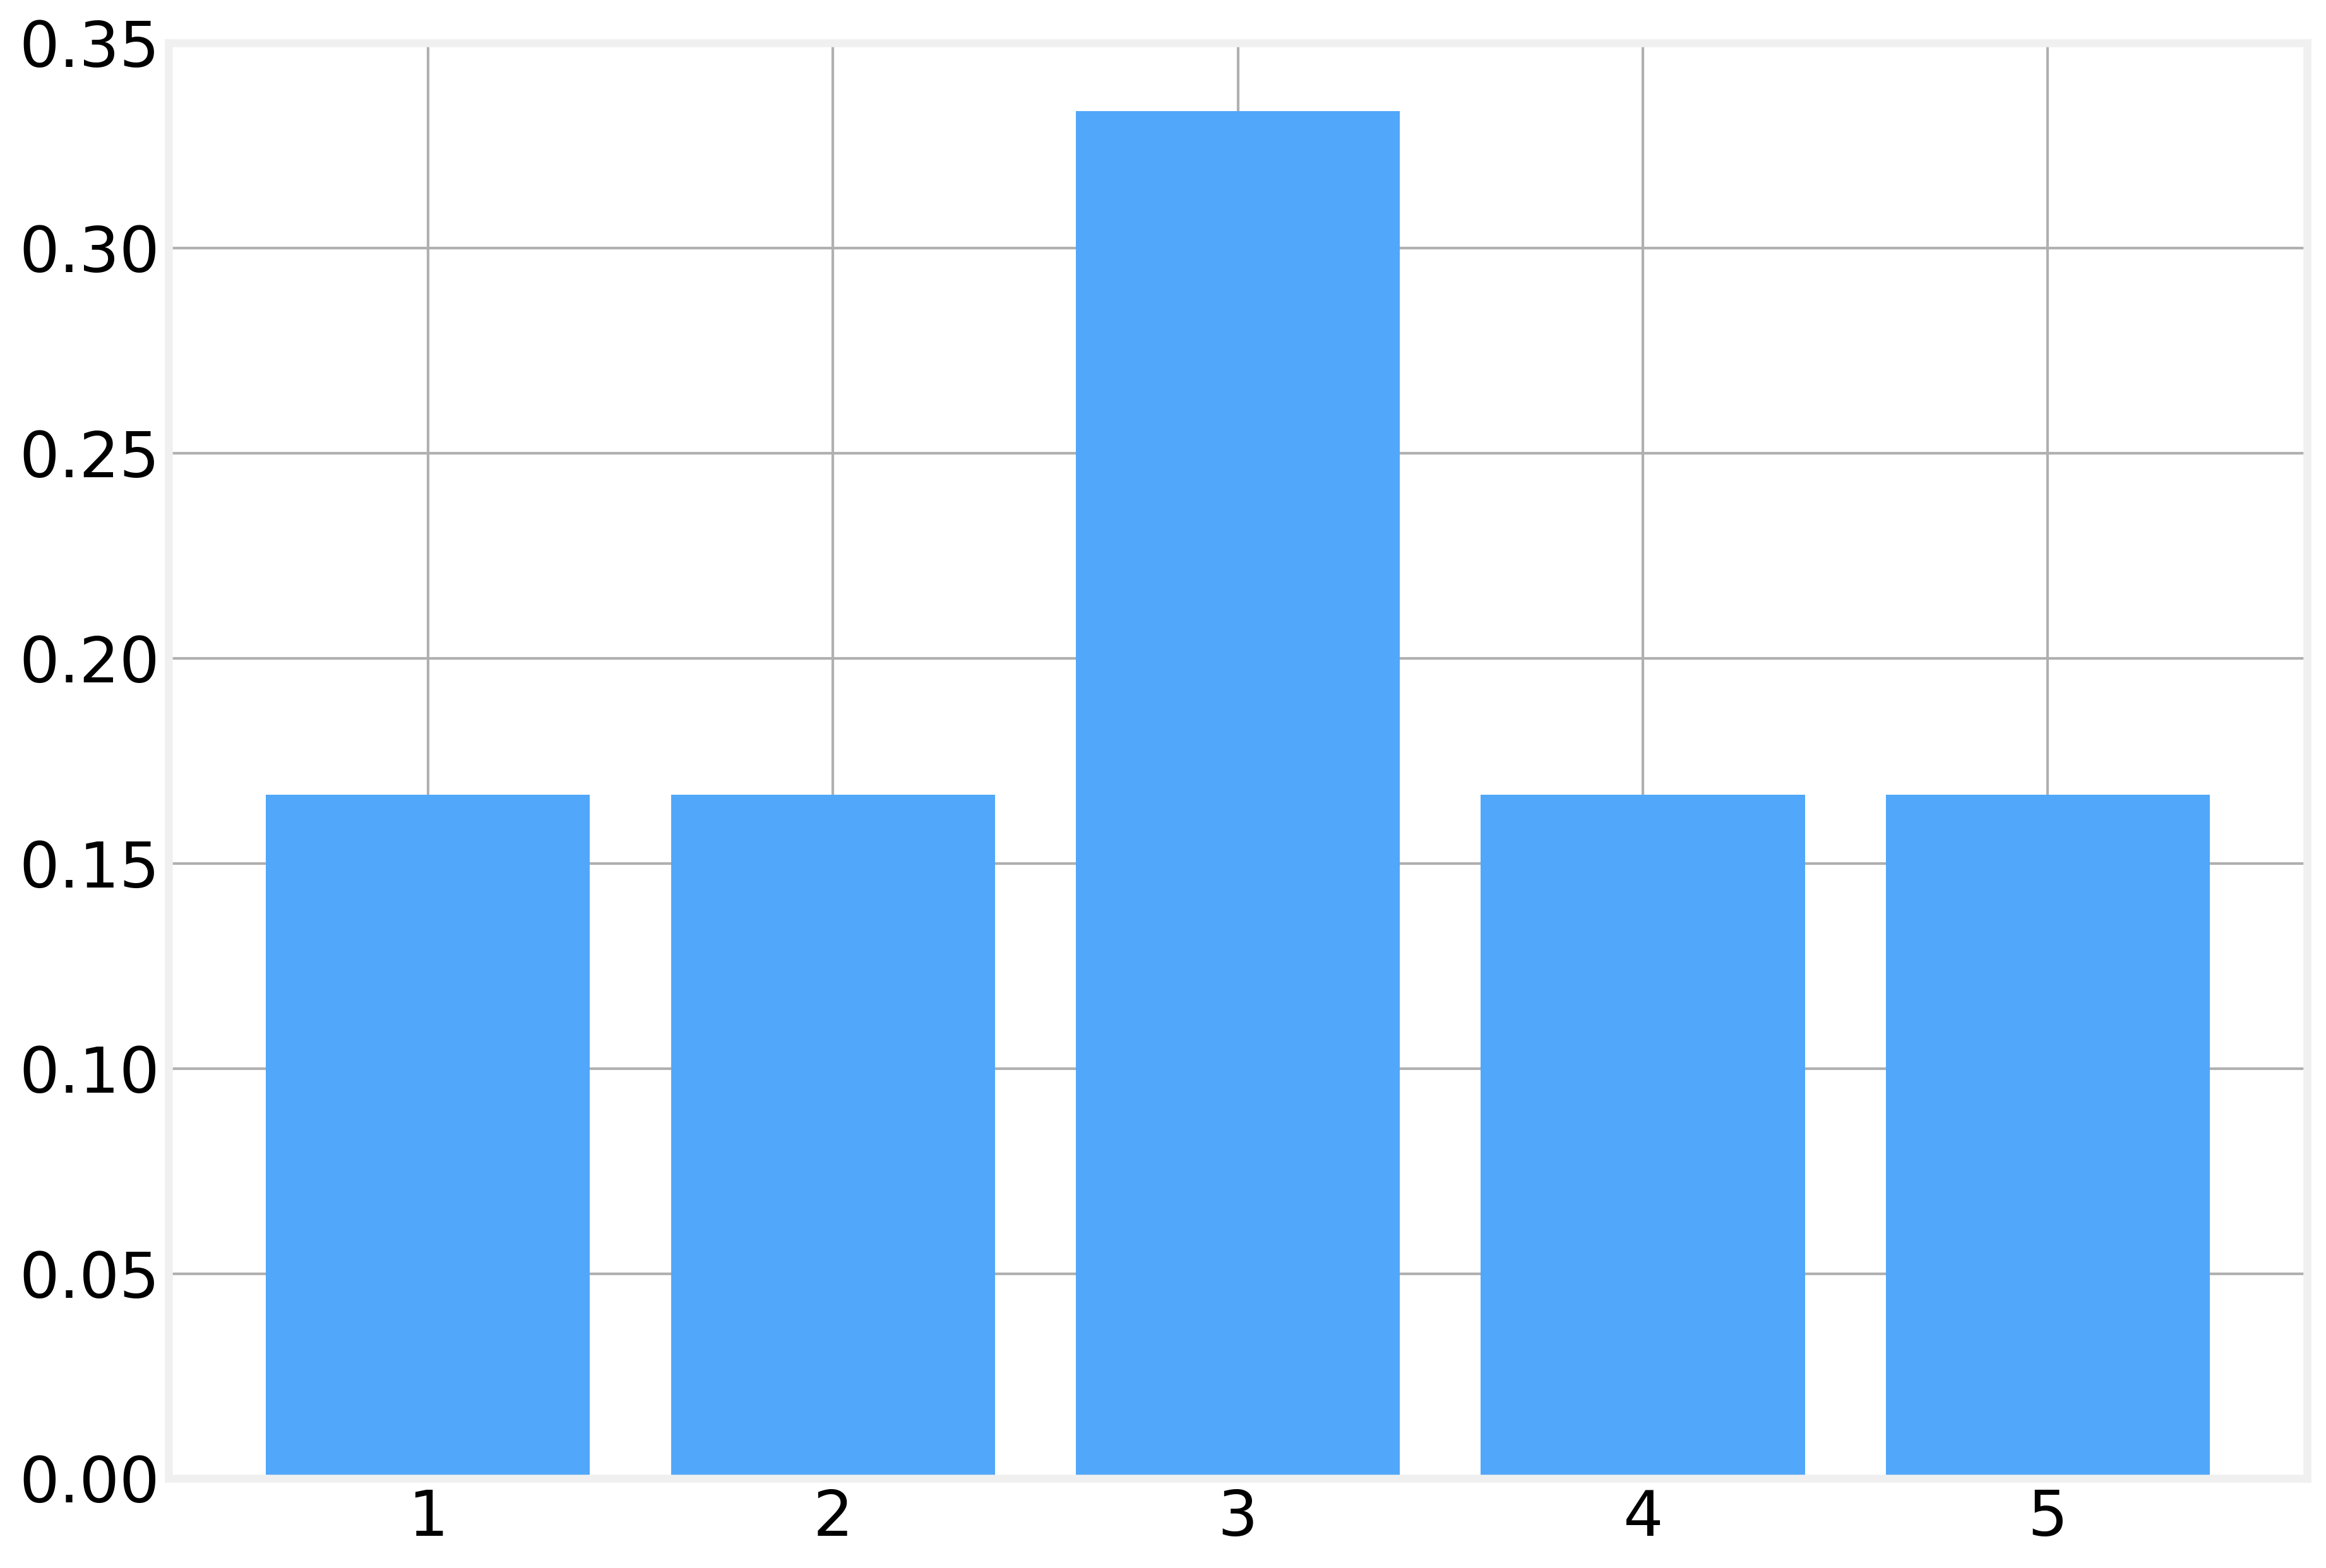

In [21]:
plt.bar(dist.T[0], dist.T[1])

The first step is to calculate the cumulative distribution.

In [22]:
cumul = dist.copy()
cumul.T[1] = cumul.T[1].cumsum()

Text(0, 0.5, '$P\\left(x<= X\\right)$')

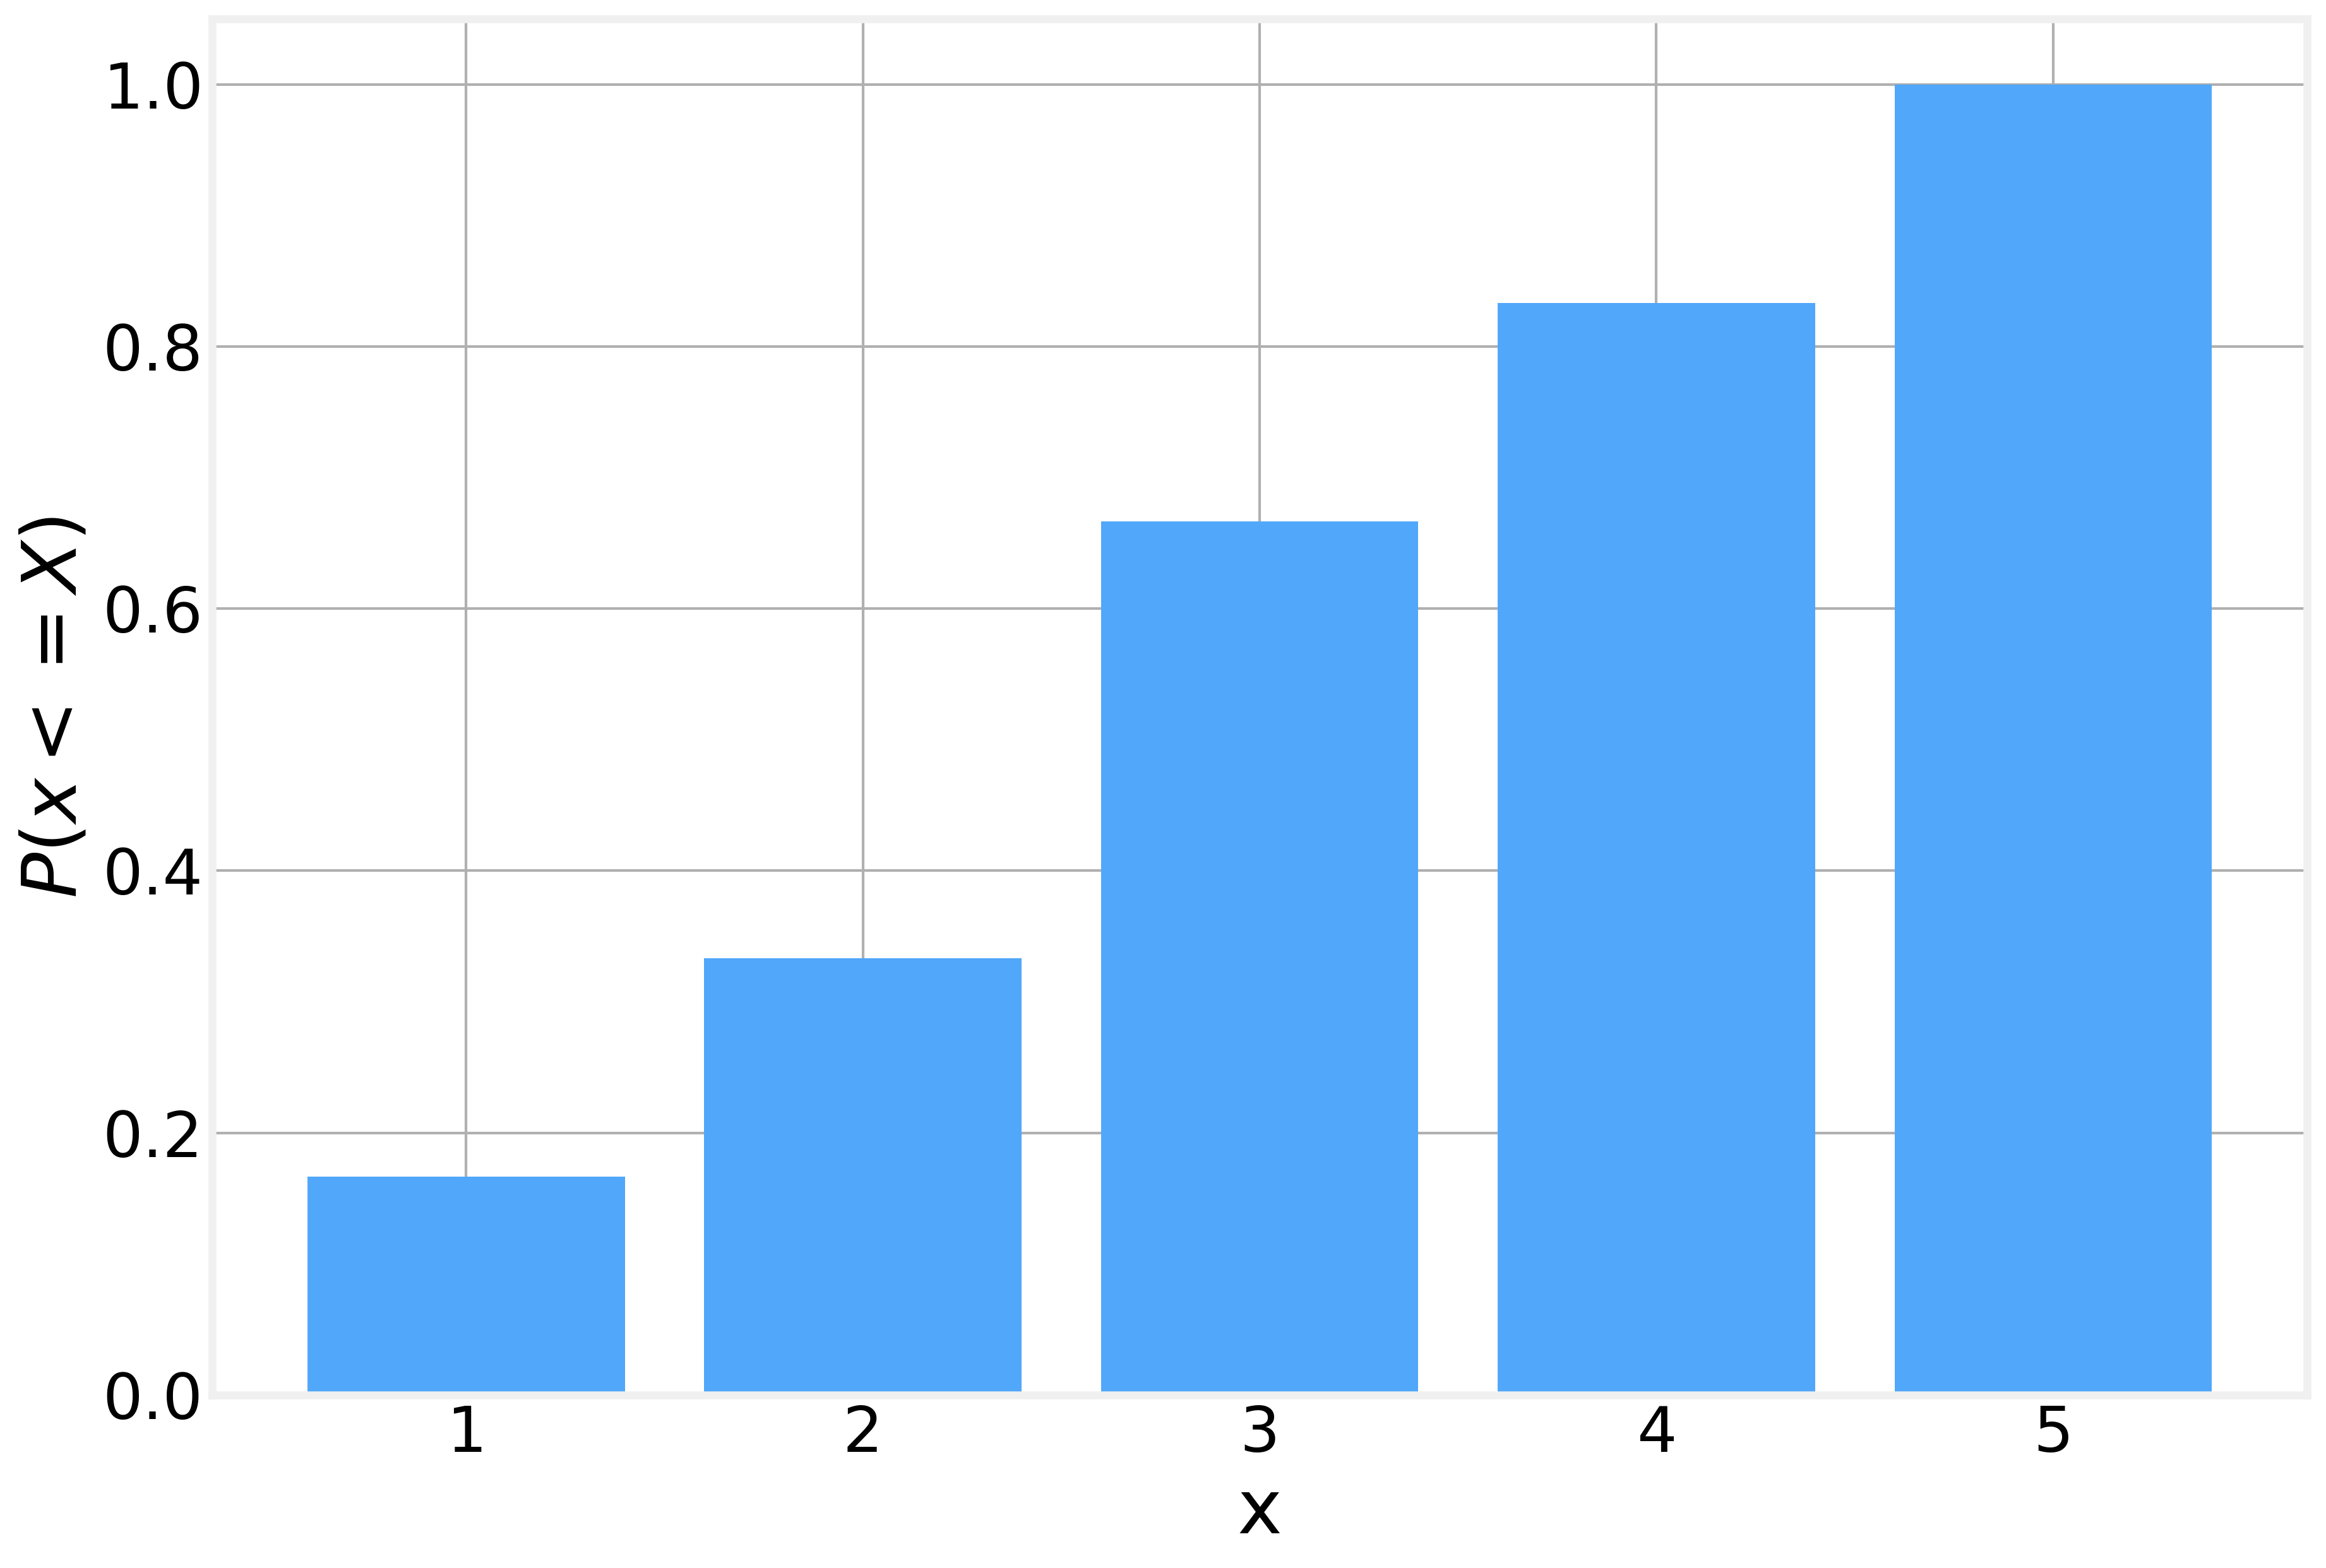

In [23]:
plt.bar(cumul.T[0], cumul.T[1])
plt.xlabel('x')
plt.ylabel(r'$P\left(x<= X\right)$')

Now we just need to generate randomly uniformly distributed numbers and invert the function. We can do this numerically

In [24]:
def invert_cumul(value, cumul):
    pos = np.searchsorted(cumul.T[1], value, side="left")
    return cumul.T[0][pos]

In this simple case, a few quick checks can be run easily by "hand". By looking at the figure above, we can see that a y value of 0.7 should result in position 4, while a y value of 0.1 should result in position 1

In [25]:
values = [0.7, 0.1]
print(invert_cumul(values, cumul))

[4. 1.]


The distribution can be verified by running a few thousand examples

In [26]:
values = np.random.random(10_000)
rolls = invert_cumul(values, cumul)

In [27]:
def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x: x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

In [28]:
dist2 = pmf(rolls, normed=True)

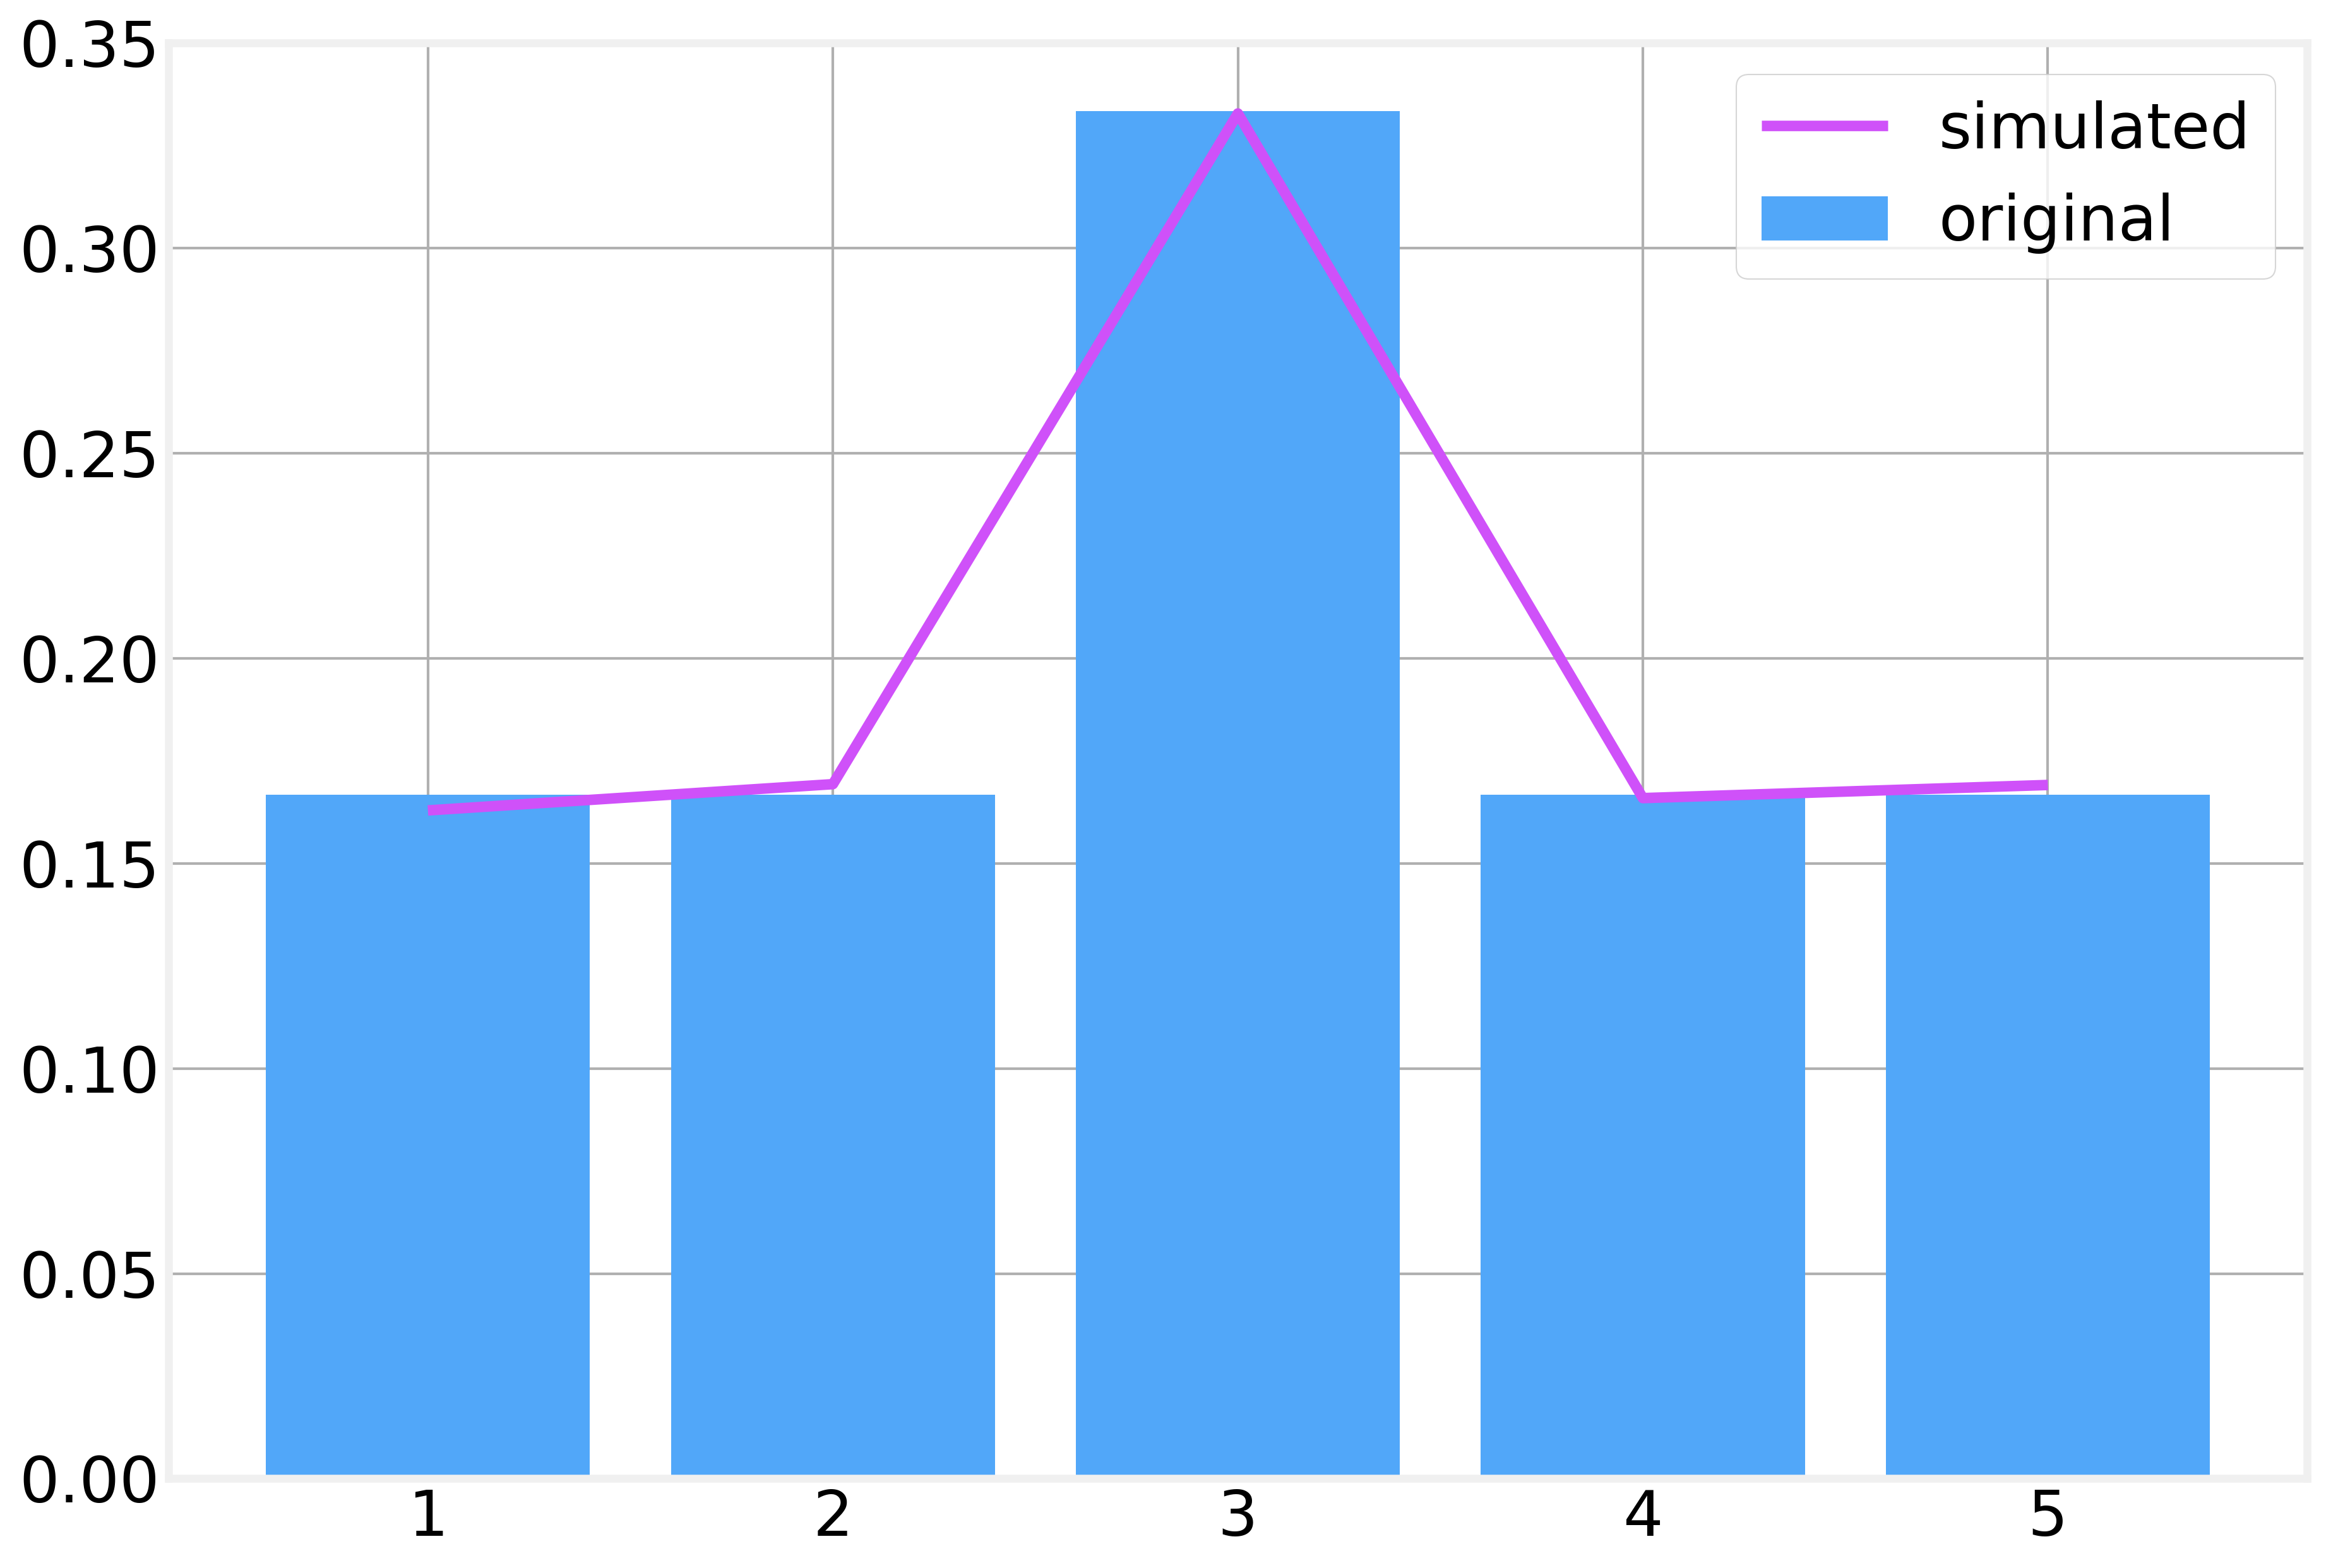

In [29]:
fig, ax = plt.subplots(1)
ax.bar(dist.T[0], dist.T[1], label='original')
ax.plot(dist2.T[0], dist2.T[1], label='simulated', color=colors[1])
ax.legend()

## Sums and Averages

In [30]:
def flip_coin(n_coins, n_times, p=0.5):
    return 2*(np.random.random((n_times, n_coins)) < p)-1

In [31]:
values = flip_coin(5, 10_000)

In [32]:
values[:10]

array([[-1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1, -1, -1],
       [-1,  1, -1,  1, -1],
       [ 1,  1,  1, -1,  1],
       [-1, -1,  1, -1,  1],
       [ 1, -1, -1,  1,  1],
       [-1,  1, -1,  1,  1]])

In [33]:
total = values.sum(axis=1)

In [34]:
total[:10]

array([ 3, -1, -3, -1, -3, -1,  3, -1,  1,  1])

In [35]:
dist = pmf(total, normed=True)

Simply compute the probability using the formula derived in the slides

In [36]:
prob = np.array([
    np.math.factorial(5)/(
        np.math.factorial(i)*np.math.factorial(5-i)
    )*np.power(0.5, i)*np.power(0.5, 5-i) 
    for i in range(6)])

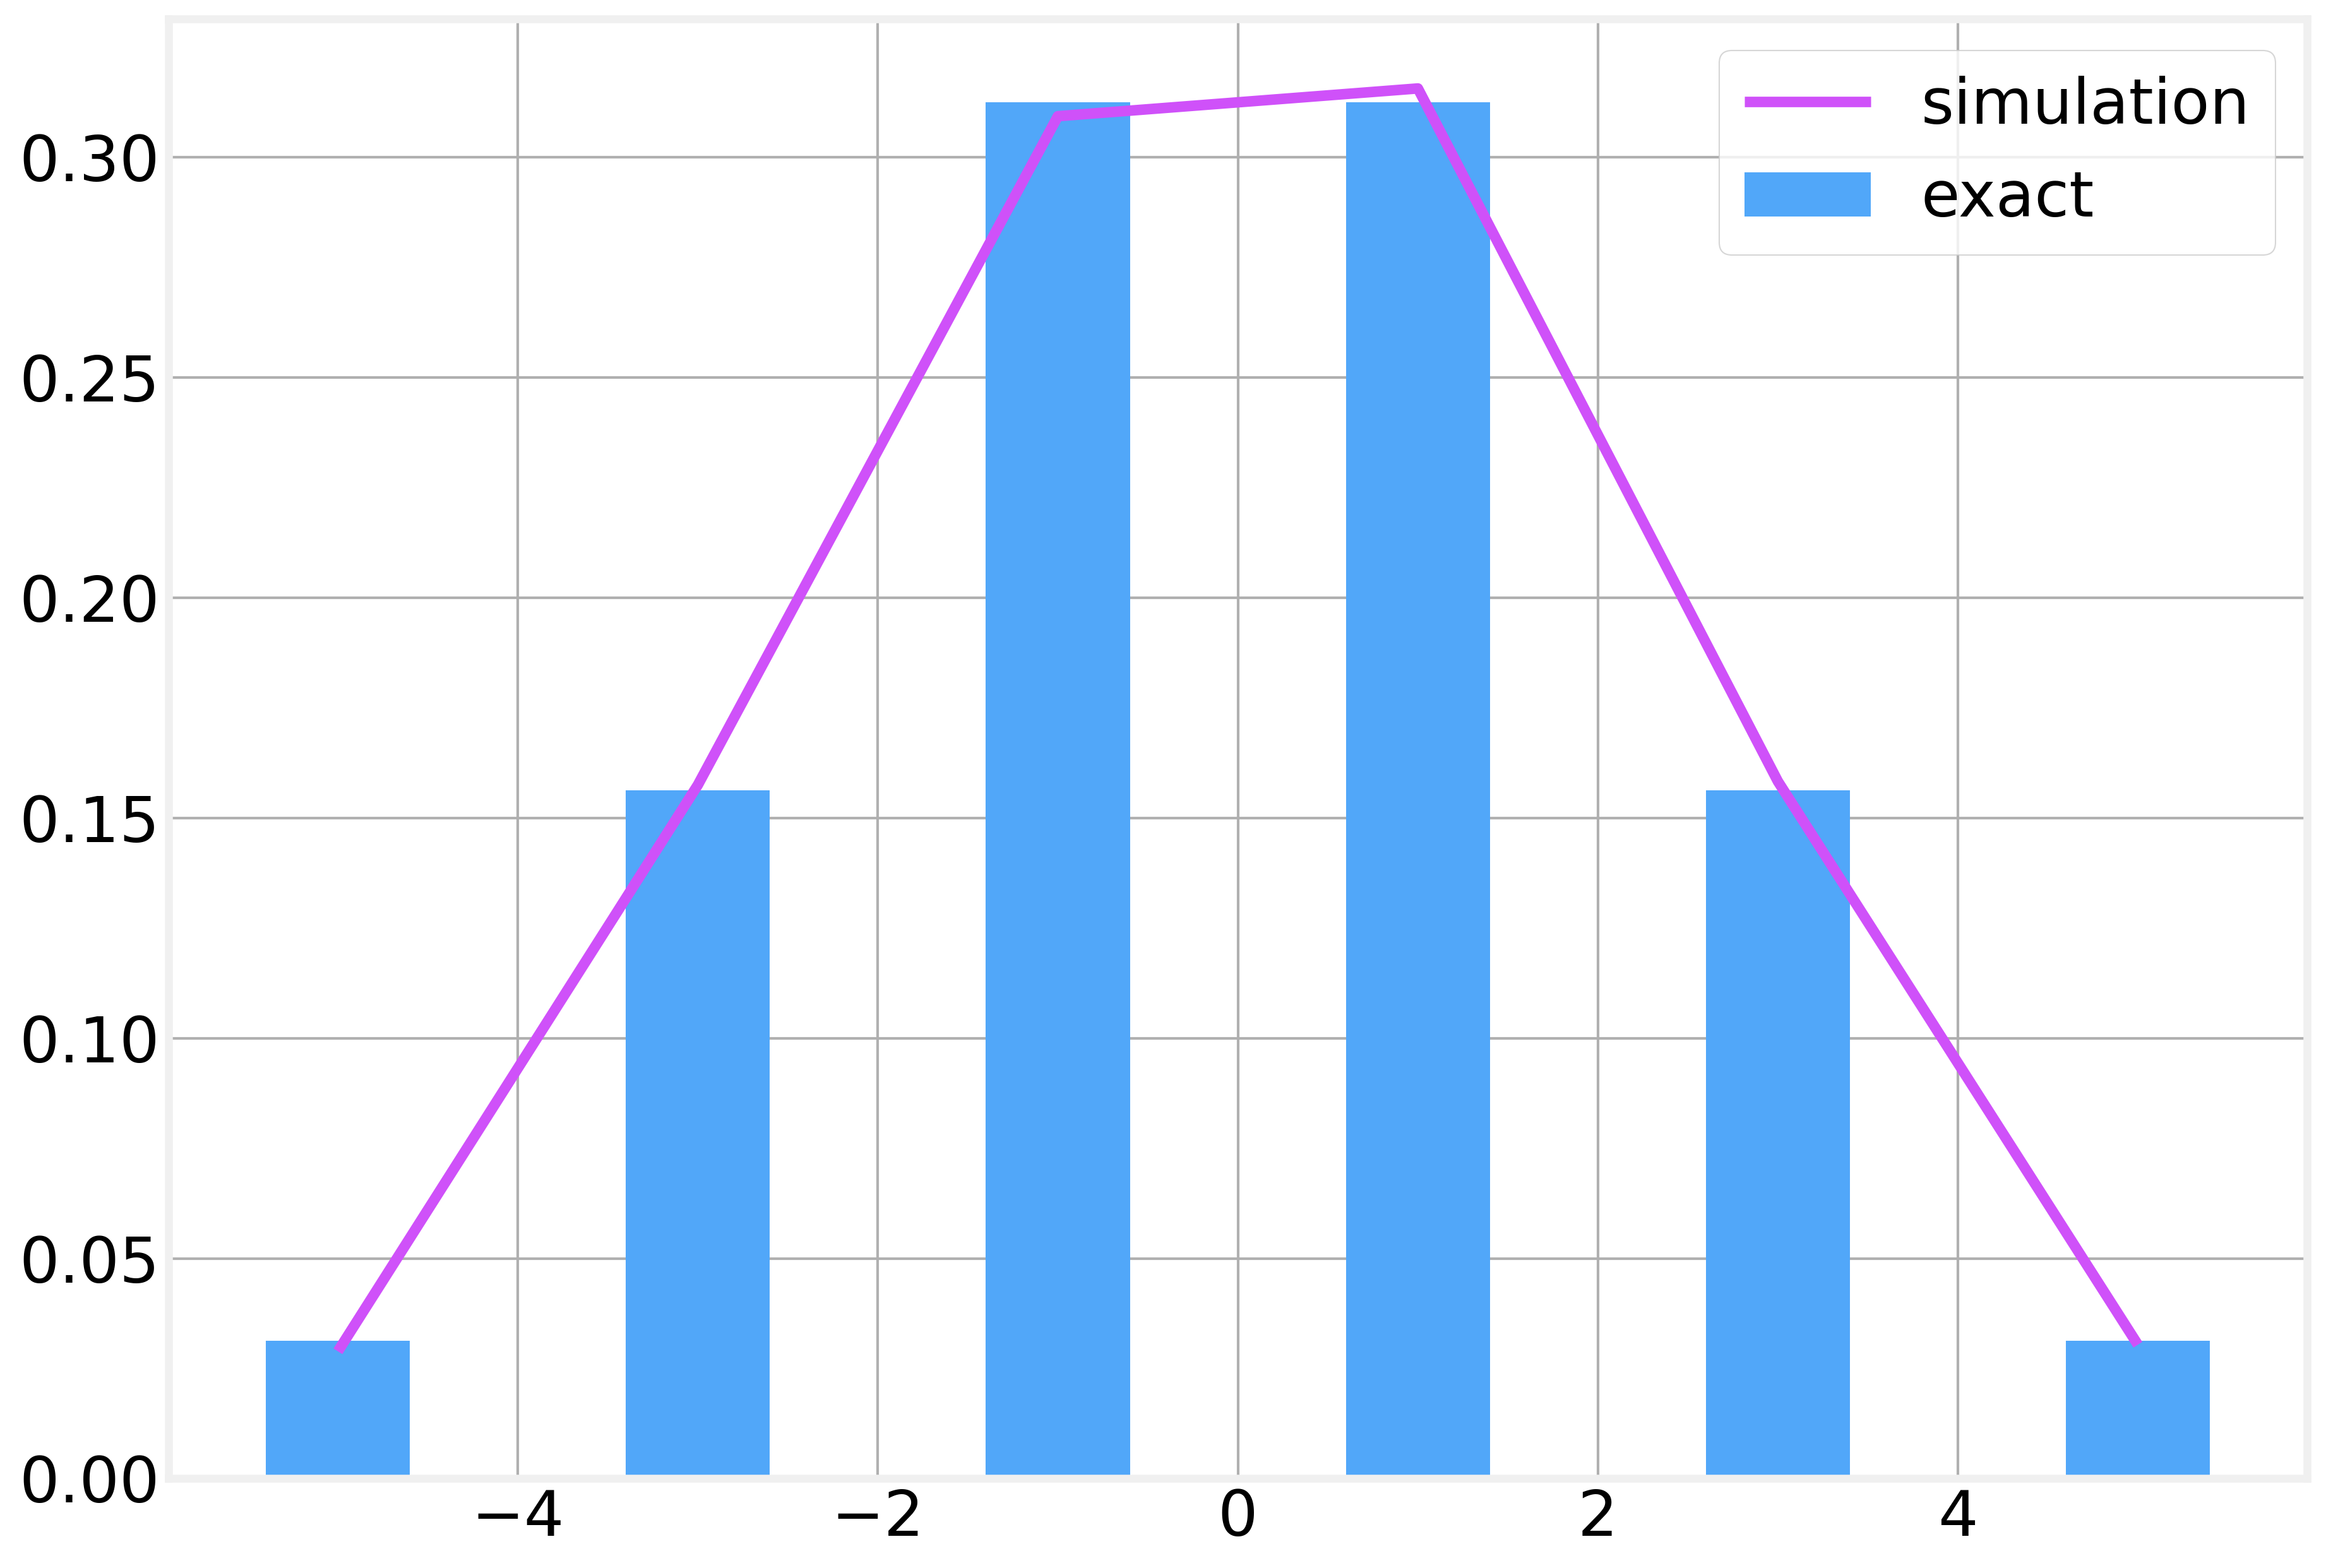

In [37]:
fig, ax = plt.subplots(1)
ax.bar([-5, -3, -1, 1, 3, 5], prob, label="exact")
ax.plot(dist.T[0], dist.T[1], color=colors[1], label="simulation")
ax.legend()

Naturally, we expect the curve to be symmetric as there are exactly as many ways of having 3 heads and 2 tails as there are of having 3 tails and 2 heads.

# Law of Large Numbers

In [38]:
np.random.seed(42)
N_samples = 1000
rand = np.random.random(N_samples)

Text(0, 0.5, 'Running average')

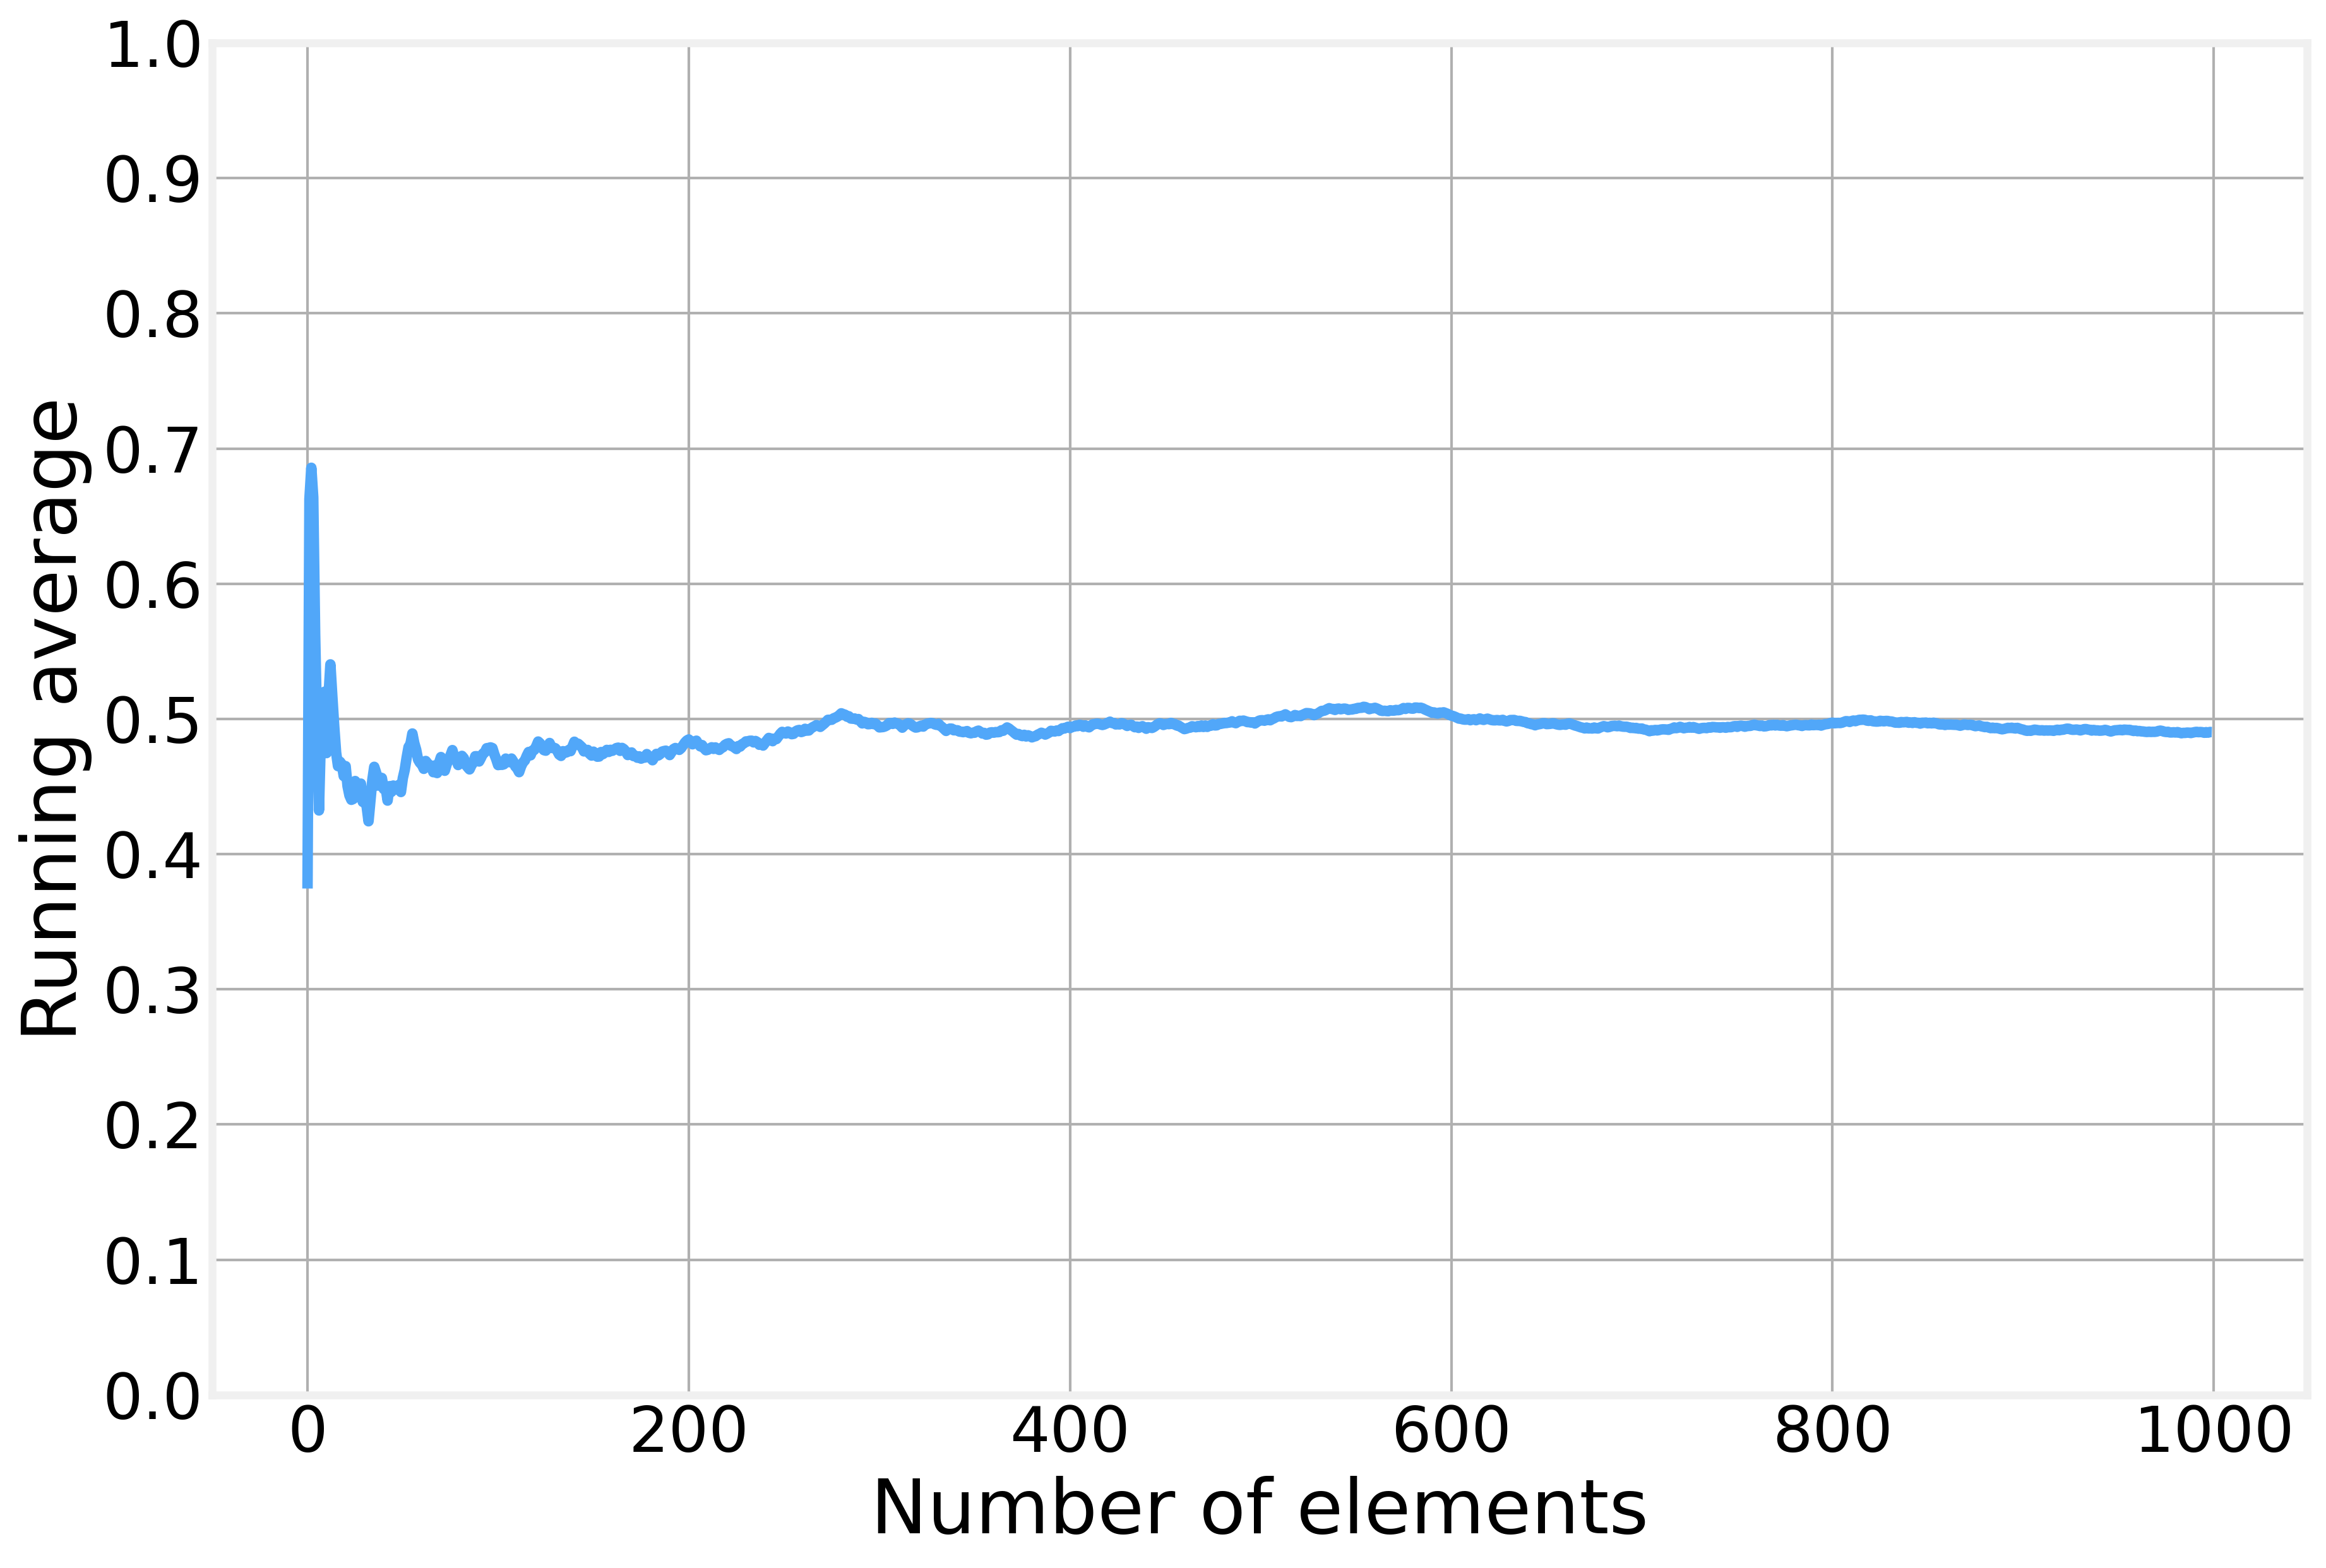

In [39]:
fig, ax = plt.subplots(1)
ax.plot(rand.cumsum()/np.arange(1, N_samples+1))
ax.set_ylim(0, 1)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_xlabel("Number of elements")
ax.set_ylabel("Running average")

In [40]:
N_runs = 1000
runs = np.random.random((N_runs, N_samples))

In [41]:
means = runs.mean(axis=1)

In [42]:
counts, bin_ranges = np.histogram(means, bins=50)

Text(0, 0.5, 'count')

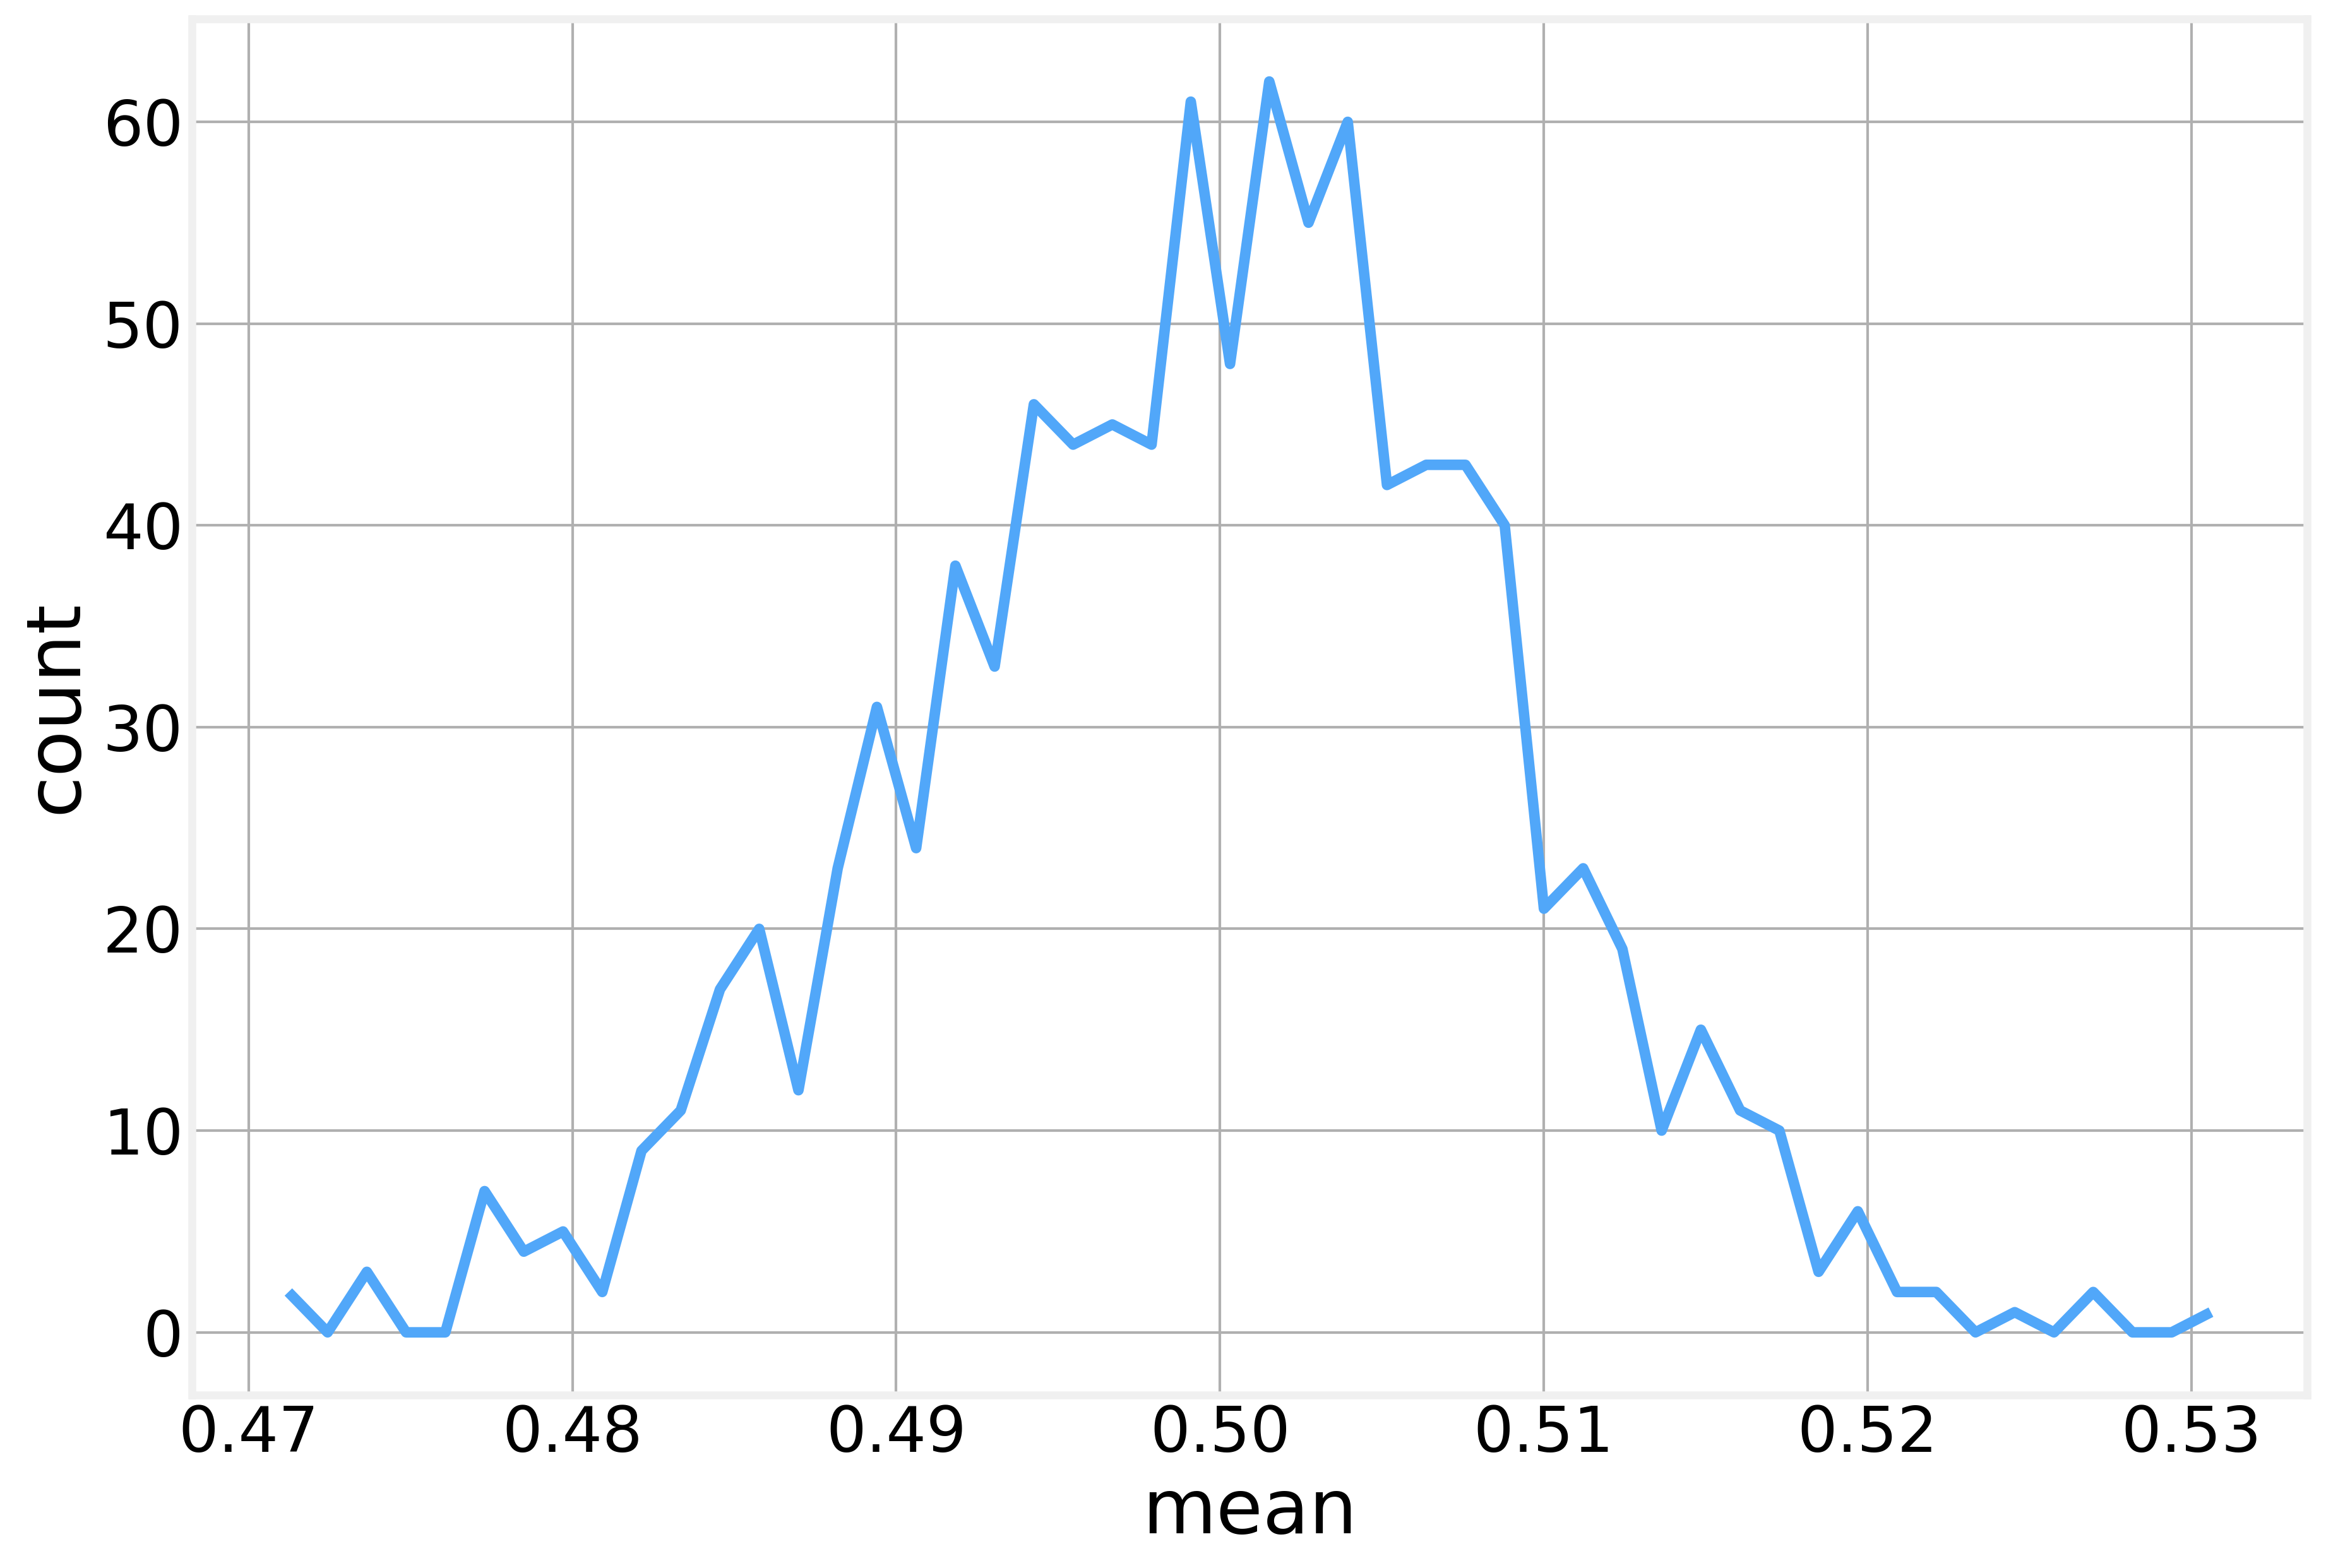

In [43]:
fig, ax = plt.subplots(1)
ax.plot(bin_ranges[:-1], counts)
ax.set_xlabel('mean')
ax.set_ylabel('count')

# Central Limit Theorem

Let us now take a look at the sum of the values of dice by rolling 20 dice, 100000 times.

In [44]:
def roll_dice(n_dice, n_times, sides=6):
    return np.random.randint(1, sides+1, size=(n_times, n_dice))

In [45]:
values = roll_dice(20, 100_000)

The distribution of the sum of the values is:

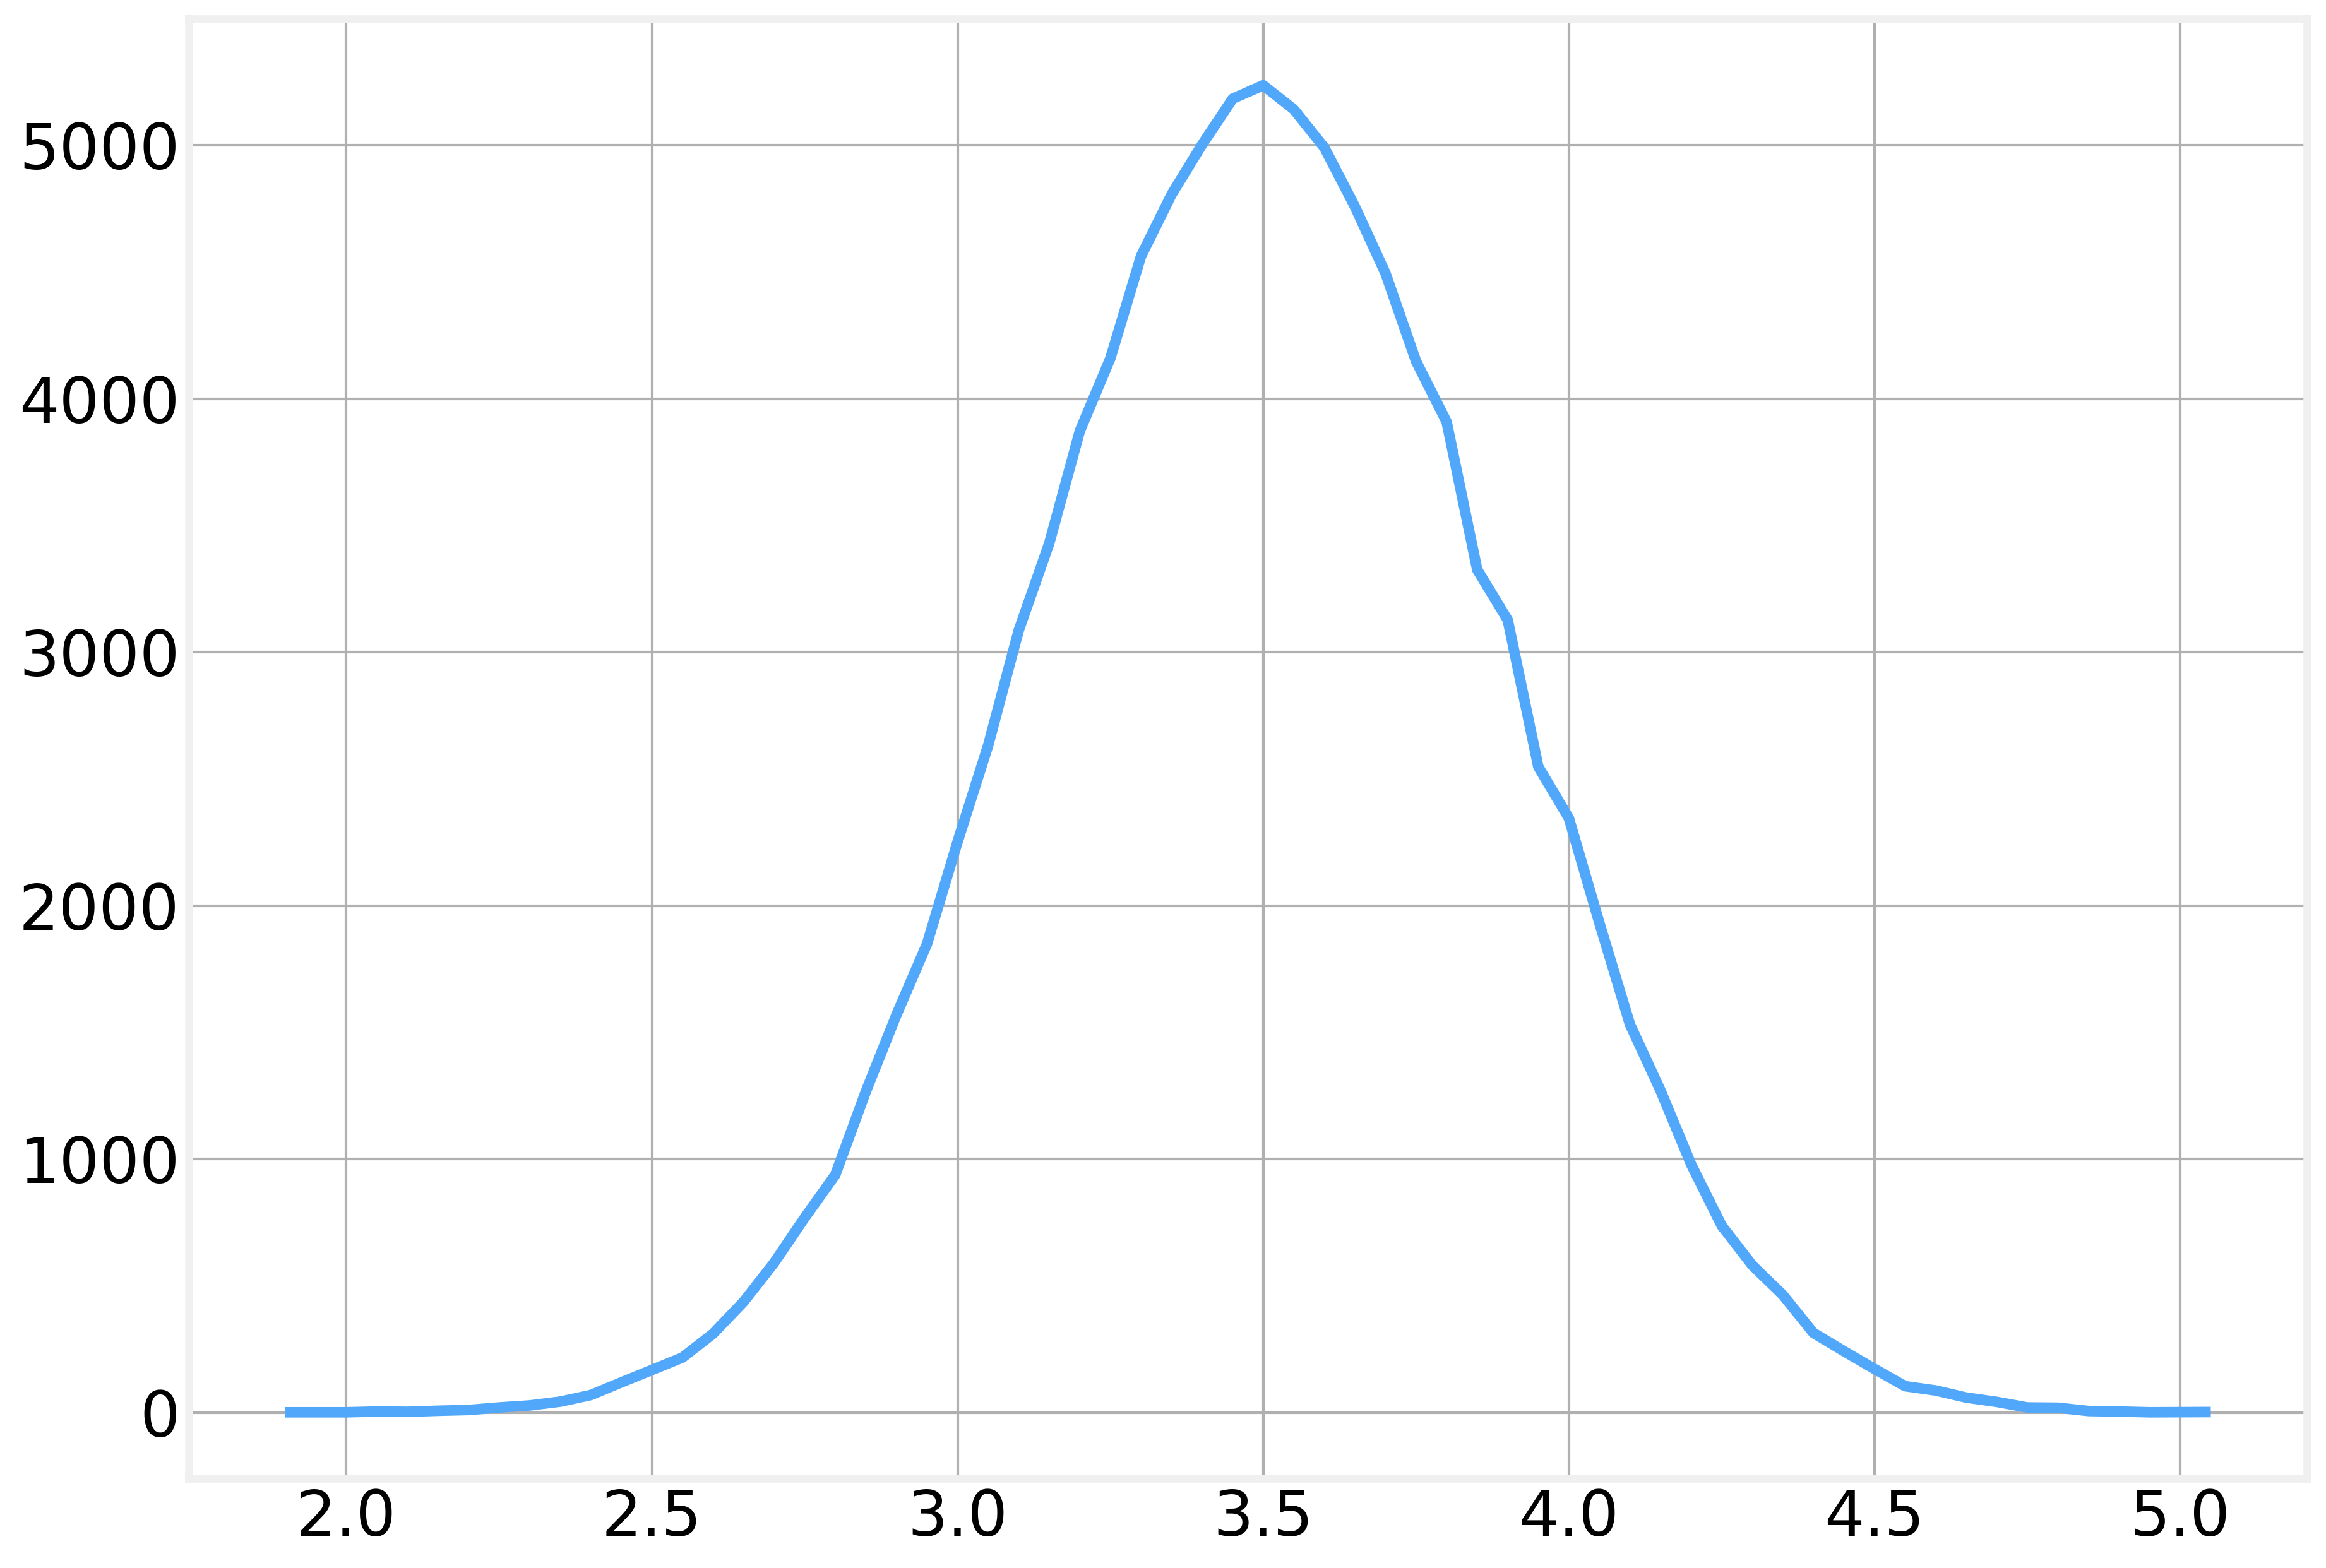

In [46]:
total = values.mean(axis=1)
dist = pmf(total)
plt.plot(dist.T[0], dist.T[1])

Where we get our first glimpse at a bell shaped curve. This result is perhaps less surprising if you consider that calculating the sum is strongly connected with  to calculating the average. We can easily see how adding more dice gradually makes us move towards a bell shaped curve.

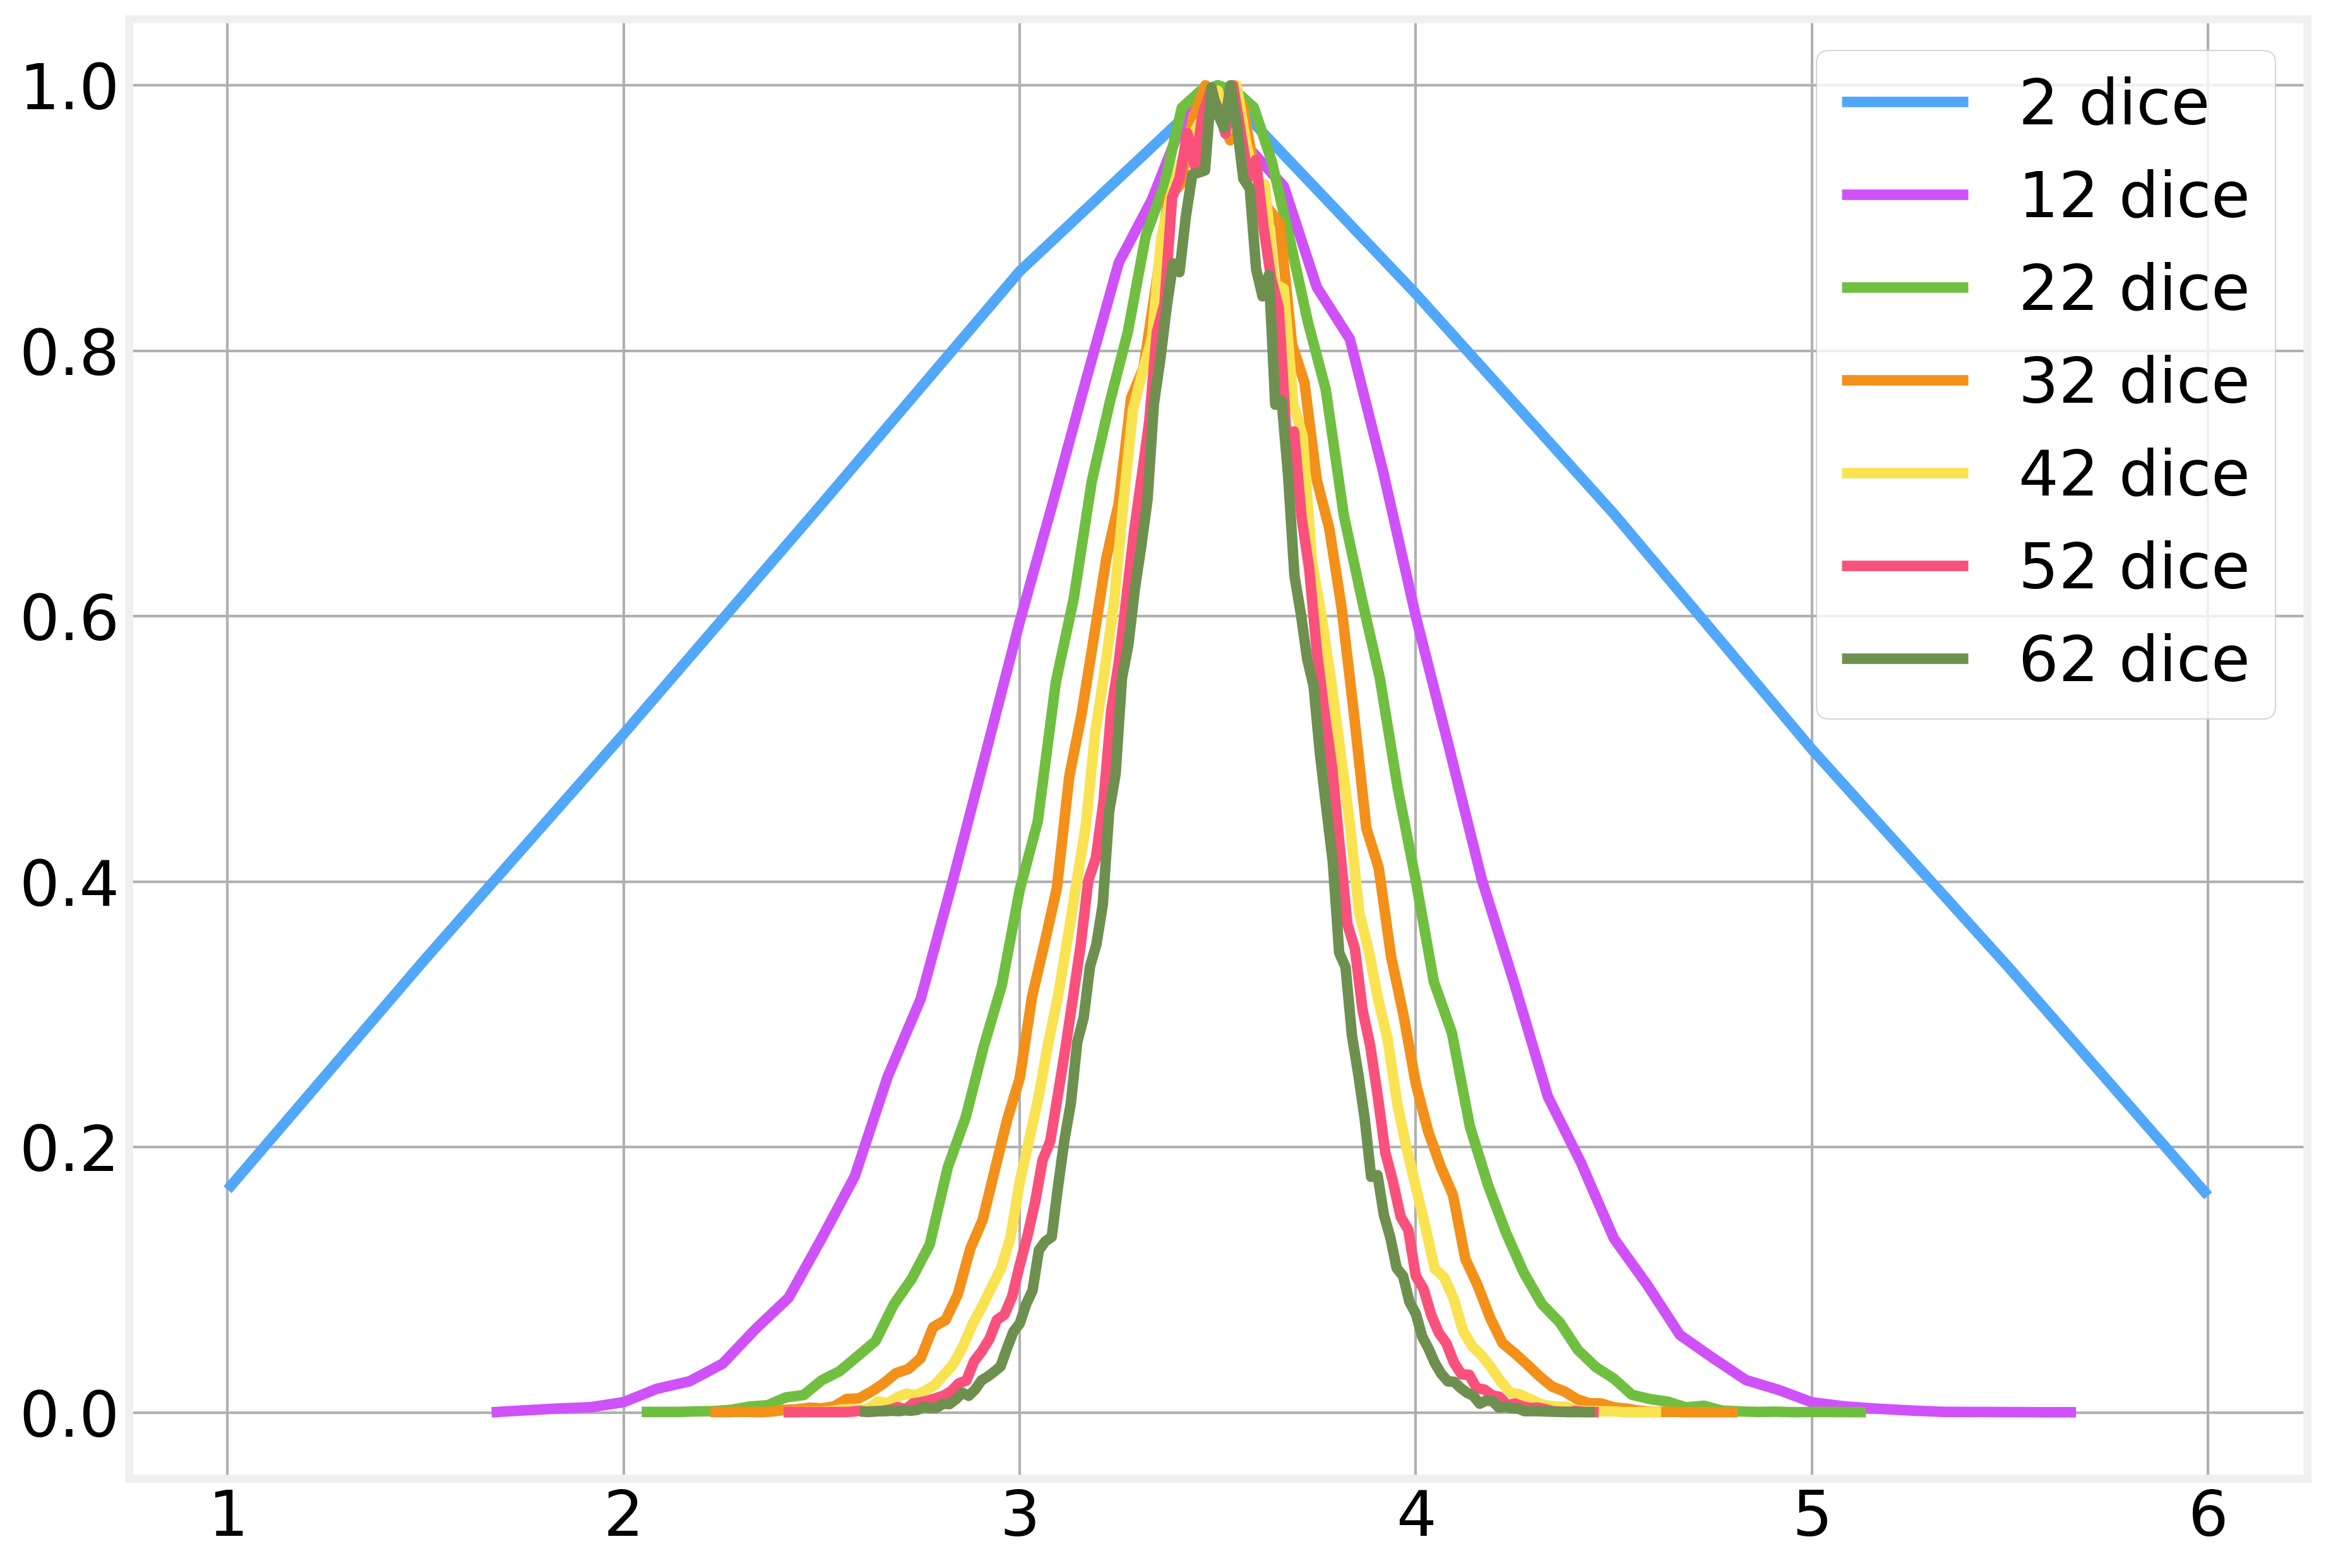

In [47]:
for i in range(2, 63, 10):
    values = roll_dice(i, 100_000)
    dist = pmf(values.mean(axis=1), normed=True)
    plt.plot(dist.T[0], dist.T[1]/dist.T[1].max(), label="%u dice" % i)

plt.legend()

where we took the average instead of the sum and normalized the curve by the maximum value for ease of visualization

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>